# Solar Footprints Feasibility Analysis

### Business Context:

In the drive toward renewable energy, selecting optimal, cost-effective sites for solar installations is critical for developers, utilities, and policymakers. The "Solar Footprints in California" dataset enables data-driven decisions on site feasibility by offering insights into infrastructure proximity, land classification, and available acreage. Predictive models using this dataset can help stakeholders avoid costly, suboptimal locations, ensure sustainable growth, enhance ROI, and secure high-value sites faster. Ultimately, this resource supports strategic planning for solar expansion, aligning economic and environmental priorities with California's energy goals.

### Main Objectives:

- Classify sites for feasibility: Develop predictive models to classify potential solar installation sites as feasible or non-feasible based on technoeconomic criteria. 

- Optimize resource allocation: Prioritize high-value, cost-effective locations to ensure efficient investment and maximize returns for stakeholders.

- Support strategic renewable energy planning: Enable developers, utilities, and policymakers to make informed decisions that align with California's energy and environmental goals.

- Minimize risks of suboptimal investments: Reduce financial, operational, and environmental risks by avoiding the development of non-feasible solar sites.

### Overall Business Impact:

- Improved Decision-Making: Enables developers, utilities, and policymakers to make data-driven decisions about solar site feasibility, reducing uncertainty and improving confidence in project planning.

- Cost savings: Avoids costly investments in non-feasible locations, saving financial and operational resources while ensuring funds are allocated effectively to high-potential sites.

- Accelerated renewable energy expansion: Supports California’s push for renewable energy by identifying and prioritizing feasible sites, ensuring faster progress toward clean energy goals and reducing dependency on fossil fuels.

- Enhanced economic and environmental alignment: Balances economic priorities with environmental sustainability, helping stakeholders achieve higher returns while adhering to regulatory and ecological standards.

## Articulating False Positives and False Negatives

### False Positives (FPs): 

- A False Positive occurs when the model incorrectly predicts the site as feasible when it is actually non-feasible.

**Impact**:

- **Financial Loss**: Stakeholders might invest in a suboptimal site, leading to increased costs for installation and maintenance with poor energy yield.

- **Inefficiency**: Resources and efforts are wasted on developing sites that fail to meet the necessary economic or technical thresholds.

- **Environmental Risks**: Developing non-feasible sites may harm ecosystems or lead to regulatory issues if the site is not suited for solar infrastructure.

### False Negatives (FNs): 

- A False Negative occurs when the model incorrectly predicts the site as non-feasible when it is actually feasible.

**Impact**:

- **Missed Opportunities**: High-potential sites are overlooked, causing delays in renewable energy adoption.

- **Lower ROI**: Stakeholders fail to maximize their investments by ignoring cost-effective, high-yield sites.

- **Strategic Gaps**: Policymakers and developers may miss opportunities to align projects with California’s energy goals, slowing progress toward renewable energy targets.


In this scenario, the balance depends on the stakeholders specific priorities:

- If stakeholders have limited budgets and are highly risk-averse, minimizing False Positives is more critical.

- If the overarching objective is rapid renewable energy deployment and maximizing impact, minimizing False Negatives should take precedence.

However, a hybrid approach, emphasizing low FPs while managing FNs to avoid major missed opportunities, is likely the most practical strategy in this case.

## 1. Importing the Necessary Libraries

Importing the libraries needed for data manipulation and analysis.

In [ ]:
# Data manipulation and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn imports
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import root_mean_squared_error
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Machine learning models
from sklearn.ensemble import RandomForestRegressor

# MLflow imports
import mlflow
import mlflow.sklearn
from mlflow.tracking import MlflowClient
from mlflow.entities import ViewType

# For handling requests
import requests

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# For JSON handling
import json
# set this to the remote server (where the MLflow server is running)
MLFLOW_TRACKING_URI = 'http://131.247.92.12:5010'

import mlflow
mlflow.set_tracking_uri(MLFLOW_TRACKING_URI)
import os
os.environ['MLFLOW_TRACKING_USERNAME'] = 'yashchauhan'
os.environ['MLFLOW_TRACKING_PASSWORD'] = '553088'

from warnings import warn

np.random.seed(1) # set this to ensure the results are repeatable. 

## 2. Loading the Dataset

In [ ]:
data = pd.read_csv("/Users/yashc/Documents/Machine_Learning/Final_Project/Solar_Footprints.csv")
data

,OBJECTID,County,Acres,Install Type,Urban or Rural,Combined Class,Distance to Substation (Miles) GTET 100 Max Voltage,Percentile (GTET 100 Max Voltage),Substation Name GTET 100 Max Voltage,HIFLD ID (GTET 100 Max Voltage),...,Percentile (GTET 200 Max Voltage),Substation Name GTET 200 Max Voltage,HIFLD ID (GTET 200 Max Voltage),Distance to Substation (Miles) CAISO,Percentile (CAISO),Substation CASIO Name,HIFLD ID (CAISO),Solar Technoeconomic Intersection,Shape__Area,Shape__Length
0,1,Alameda County,1.672639,Rooftop,Urban,Rooftop - Urban,0.162732,0 to 25th,Dixon Landing,309200.0,...,0 to 25th,Los Esteros,310258.0,2.272283,0 to 25th,Los Esteros,310258.0,Within,6768.954679,365.801336
1,2,Alameda County,1.897078,Rooftop,Urban,Rooftop - Urban,0.226728,0 to 25th,Dixon Landing,309200.0,...,0 to 25th,Los Esteros,310258.0,2.392816,0 to 25th,Los Esteros,310258.0,Within,7677.228982,366.909878
2,3,Alameda County,1.275783,Rooftop,Urban,Rooftop - Urban,0.426104,0 to 25th,Dixon Landing,309200.0,...,0 to 25th,Los Esteros,310258.0,2.537298,0 to 25th,Los Esteros,310258.0,Within,5162.935990,290.576263
3,4,Alameda County,1.424286,Rooftop,Urban,Rooftop - Urban,0.491306,0 to 25th,Dixon Landing,309200.0,...,0 to 25th,Los Esteros,310258.0,2.626699,0 to 25th,Los Esteros,310258.0,Within,5763.905754,344.705846
4,5,Alameda County,0.984429,Rooftop,Urban,Rooftop - Urban,0.795822,0 to 25th,Dixon Landing,309200.0,...,0 to 25th,Los Esteros,310258.0,2.728629,25th to 50th,Los Esteros,310258.0,Within,3983.859693,283.968425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5392,5393,Humboldt County,8.027071,Ground,Urban,Ground - Urban,12.645804,75th to 100th,Humboldt,303673.0,...,75th to 100th,Trinity,306872.0,12.645804,75th to 100th,Humboldt,303673.0,Within,32484.744141,975.018897
5393,5394,Imperial County,45.846748,Ground,Rural,Ground - Rural,2.555937,25th to 50th,Arkansas,305625.0,...,0 to 25th,Sonora,306452.0,5.045383,25th to 50th,Bannister,309851.0,Outside,185535.927505,1744.144759
5394,5395,Riverside County,1.310016,Parking,Rural,Parking - Rural,6.153761,50th to 75th,Avenue 58,300979.0,...,50th to 75th,Coachella Valley,305826.0,34.855386,75th to 100th,Devers,307400.0,Outside,5301.462830,331.990854
5395,5396,Riverside County,0.600725,Parking,Rural,Parking - Rural,7.126165,75th to 100th,Coachella Valley,305826.0,...,50th to 75th,Coachella Valley,305826.0,38.155769,75th to 100th,Devers,307400.0,Within,2431.056732,193.279911


Let's take a quick look at the first few rows of the dataset.

In [5]:
data.head()

,OBJECTID,County,Acres,Install Type,Urban or Rural,Combined Class,Distance to Substation (Miles) GTET 100 Max Voltage,Percentile (GTET 100 Max Voltage),Substation Name GTET 100 Max Voltage,HIFLD ID (GTET 100 Max Voltage),...,Percentile (GTET 200 Max Voltage),Substation Name GTET 200 Max Voltage,HIFLD ID (GTET 200 Max Voltage),Distance to Substation (Miles) CAISO,Percentile (CAISO),Substation CASIO Name,HIFLD ID (CAISO),Solar Technoeconomic Intersection,Shape__Area,Shape__Length
0,1,Alameda County,1.672639,Rooftop,Urban,Rooftop - Urban,0.162732,0 to 25th,Dixon Landing,309200.0,...,0 to 25th,Los Esteros,310258.0,2.272283,0 to 25th,Los Esteros,310258.0,Within,6768.954679,365.801336
1,2,Alameda County,1.897078,Rooftop,Urban,Rooftop - Urban,0.226728,0 to 25th,Dixon Landing,309200.0,...,0 to 25th,Los Esteros,310258.0,2.392816,0 to 25th,Los Esteros,310258.0,Within,7677.228982,366.909878
2,3,Alameda County,1.275783,Rooftop,Urban,Rooftop - Urban,0.426104,0 to 25th,Dixon Landing,309200.0,...,0 to 25th,Los Esteros,310258.0,2.537298,0 to 25th,Los Esteros,310258.0,Within,5162.935990,290.576263
3,4,Alameda County,1.424286,Rooftop,Urban,Rooftop - Urban,0.491306,0 to 25th,Dixon Landing,309200.0,...,0 to 25th,Los Esteros,310258.0,2.626699,0 to 25th,Los Esteros,310258.0,Within,5763.905754,344.705846
4,5,Alameda County,0.984429,Rooftop,Urban,Rooftop - Urban,0.795822,0 to 25th,Dixon Landing,309200.0,...,0 to 25th,Los Esteros,310258.0,2.728629,25th to 50th,Los Esteros,310258.0,Within,3983.859693,283.968425


## 3. Exploring the Dataset

Understanding the structure and content of the dataset is essential before proceeding with data preparation.

### 3.1. Dataset Information

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5397 entries, 0 to 5396
Data columns (total 21 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   OBJECTID                                             5397 non-null   int64  
 1   County                                               5397 non-null   object 
 2   Acres                                                5397 non-null   float64
 3   Install Type                                         5397 non-null   object 
 4   Urban or Rural                                       5397 non-null   object 
 5   Combined Class                                       5397 non-null   object 
 6   Distance to Substation (Miles) GTET 100 Max Voltage  5397 non-null   float64
 7   Percentile (GTET 100 Max Voltage)                    5397 non-null   object 
 8   Substation Name GTET 100 Max Voltage                 5397 non-null  

### 3.2. Statistical Summary

In [7]:
data.describe(include='all')

,OBJECTID,County,Acres,Install Type,Urban or Rural,Combined Class,Distance to Substation (Miles) GTET 100 Max Voltage,Percentile (GTET 100 Max Voltage),Substation Name GTET 100 Max Voltage,HIFLD ID (GTET 100 Max Voltage),...,Percentile (GTET 200 Max Voltage),Substation Name GTET 200 Max Voltage,HIFLD ID (GTET 200 Max Voltage),Distance to Substation (Miles) CAISO,Percentile (CAISO),Substation CASIO Name,HIFLD ID (CAISO),Solar Technoeconomic Intersection,Shape__Area,Shape__Length
count,5397.000000,5397,5397.000000,5397,5397,5397,5397.000000,5397,5397,5255.000000,...,5397,5397,5165.000000,5397.000000,5397,5387,5180.000000,5397,5.397000e+03,5397.000000
unique,NaN,51,NaN,3,2,6,NaN,4,571,NaN,...,4,217,NaN,NaN,4,220,NaN,2,NaN,NaN
top,NaN,Los Angeles County,NaN,Ground,Urban,Rooftop - Urban,NaN,0 to 25th,Unknown,NaN,...,25th to 50th,Unknown,NaN,NaN,0 to 25th,Scott,NaN,Within,NaN,NaN
freq,NaN,681,NaN,2164,3631,1710,NaN,1350,469,NaN,...,1350,394,NaN,NaN,1350,164,NaN,3790,NaN,NaN
mean,2699.000000,NaN,27.839660,NaN,NaN,NaN,4.875213,NaN,NaN,305367.672883,...,NaN,NaN,305585.657696,6.488376,NaN,NaN,304801.542278,NaN,1.126635e+05,799.673056
std,1558.124032,NaN,185.731791,NaN,NaN,NaN,5.598614,NaN,NaN,3270.527238,...,NaN,NaN,3102.131691,5.257426,NaN,NaN,3049.650963,NaN,7.516313e+05,1549.493451
min,1.000000,NaN,0.000413,NaN,NaN,NaN,0.000000,NaN,NaN,300007.000000,...,NaN,NaN,300007.000000,0.000000,NaN,NaN,300004.000000,NaN,1.671917e+00,20.319768
25%,1350.000000,NaN,0.935973,NaN,NaN,NaN,1.364023,NaN,NaN,302331.000000,...,NaN,NaN,303106.000000,2.655241,NaN,NaN,301858.000000,NaN,3.787762e+03,272.550078
50%,2699.000000,NaN,2.098715,NaN,NaN,NaN,2.766023,NaN,NaN,305578.000000,...,NaN,NaN,305906.000000,5.061011,NaN,NaN,304448.000000,NaN,8.493241e+03,412.061886
75%,4048.000000,NaN,4.775675,NaN,NaN,NaN,6.182651,NaN,NaN,308662.000000,...,NaN,NaN,308822.000000,8.782869,NaN,NaN,307282.000000,NaN,1.932655e+04,645.830476


Here, we will check for the duplicates.

In [8]:
duplicates = data.duplicated().sum()
duplicates

np.int64(0)

Here, we will perform an analysis to determine the importance of features in predicting the **Solar Technoeconomic Intersection**. The process begins by encoding categorical variables into numeric format using LabelEncoder to ensure compatibility with the Random Forest model. The dataset is then split into training and testing sets to evaluate model performance. Missing values are imputed using the most frequent value strategy to maintain data integrity, followed by feature scaling with StandardScaler to normalize the data and enhance model accuracy. A Random Forest Classifier is trained on the scaled training dataset, and feature importance scores are extracted based on the model's training process. These scores provide valuable insights into the relative contribution of each feature, aiding in feature selection and model optimization for improved predictive accuracy.

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier


# Encode categorical variables
data_encoded = data.copy()
for col in data_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data_encoded[col] = le.fit_transform(data_encoded[col])

# Split data into features and target
X_full = data_encoded.drop('Solar Technoeconomic Intersection', axis=1, errors='ignore')
y_full = data_encoded['Solar Technoeconomic Intersection']

# Split data into training and testing sets
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full, y_full, test_size=0.2, random_state=42)

# Step 5: Impute missing values on training and testing sets separately
imputer = SimpleImputer(strategy='most_frequent')
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train_full), columns=X_train_full.columns)
X_test_imputed = pd.DataFrame(imputer.transform(X_test_full), columns=X_test_full.columns)

# Feature scaling on training and testing sets separately
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_imputed), columns=X_train_imputed.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test_imputed), columns=X_test_imputed.columns)

# Step 7: Fit a Random Forest model to determine feature importance using only training data
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train_full)

# Step 8: Get feature importance scores from the training data
feature_importance = rf_model.feature_importances_

# Create DataFrame of feature importance for display
feature_importance_df = pd.DataFrame({
    'Feature': X_train_scaled.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Display the DataFrame with feature importance
print("Feature Importance:\n", feature_importance_df)


Feature Importance:
                                               Feature  Importance
5                                      Combined Class    0.246119
4                                      Urban or Rural    0.135173
3                                        Install Type    0.114738
2                                               Acres    0.064308
19                                      Shape__Length    0.053751
18                                        Shape__Area    0.046249
6   Distance to Substation (Miles) GTET 100 Max Vo...    0.043183
10  Distance to Substation (Miles) GTET 200 Max Vo...    0.040281
12               Substation Name GTET 200 Max Voltage    0.035721
0                                            OBJECTID    0.035109
14               Distance to Substation (Miles) CAISO    0.029861
9                     HIFLD ID (GTET 100 Max Voltage)    0.022688
8                Substation Name GTET 100 Max Voltage    0.021898
13                    HIFLD ID (GTET 200 Max Voltage)  

Columns with low feature importance are dropped based on the feature importance analysis conducted using the Random Forest Classifier. These columns, identified as contributing minimally to the predictive model, include identifiers, percentiles, and features with low relevance to the target variable. Additionally, the feature with the highest percentage of importance, which represents a combined classification of "rural or urban" and "installation type," is also removed. This decision is based on its redundancy, as the information is already encapsulated in separate individual features. 

By retaining only high-importance features, the dataset is optimized for further analysis and modeling, reducing noise and improving computational efficiency.

In [10]:
# Dropping low-importance columns based on the analysis
columns_to_drop = [
    'OBJECTID', 'County', 
    'HIFLD ID (GTET 100 Max Voltage)', 'HIFLD ID (GTET 200 Max Voltage)', 'HIFLD ID (CAISO)', 
    'Percentile (GTET 100 Max Voltage)', 'Percentile (GTET 200 Max Voltage)', 'Percentile (CAISO)', 
    'Substation Name GTET 100 Max Voltage', 'Substation Name GTET 200 Max Voltage', 'Substation CASIO Name', 'Combined Class', 'Distance to Substation (Miles) CAISO'
]

# Creating a new dataset with only the selected high-importance columns
data = data.drop(columns=columns_to_drop)

# Display the first few rows of the filtered dataset to confirm the changes
data.head(10)


,Acres,Install Type,Urban or Rural,Distance to Substation (Miles) GTET 100 Max Voltage,Distance to Substation (Miles) GTET 200 Max Voltage,Solar Technoeconomic Intersection,Shape__Area,Shape__Length
0,1.672639,Rooftop,Urban,0.162732,2.272283,Within,6768.954679,365.801336
1,1.897078,Rooftop,Urban,0.226728,2.392816,Within,7677.228982,366.909878
2,1.275783,Rooftop,Urban,0.426104,2.537298,Within,5162.935990,290.576263
3,1.424286,Rooftop,Urban,0.491306,2.626699,Within,5763.905754,344.705846
4,0.984429,Rooftop,Urban,0.795822,2.728629,Within,3983.859693,283.968425
5,2.275561,Rooftop,Urban,1.060613,2.826298,Within,9208.905911,422.343507
6,0.824320,Rooftop,Urban,1.397360,3.083423,Within,3335.920502,232.171526
7,1.631085,Rooftop,Urban,1.346605,3.161071,Within,6600.785233,339.331694
8,1.913581,Rooftop,Urban,1.145221,3.237682,Within,7743.994226,393.800819
9,0.562090,Parking,Urban,1.169077,3.285505,Within,2274.707872,188.845197


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5397 entries, 0 to 5396
Data columns (total 8 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Acres                                                5397 non-null   float64
 1   Install Type                                         5397 non-null   object 
 2   Urban or Rural                                       5397 non-null   object 
 3   Distance to Substation (Miles) GTET 100 Max Voltage  5397 non-null   float64
 4   Distance to Substation (Miles) GTET 200 Max Voltage  5397 non-null   float64
 5   Solar Technoeconomic Intersection                    5397 non-null   object 
 6   Shape__Area                                          5397 non-null   float64
 7   Shape__Length                                        5397 non-null   float64
dtypes: float64(5), object(3)
memory usage: 337.4+ KB


## 4. Checking for Missing Values

Before proceeding, it's important to check for missing values in the dataset.

In [12]:
data.isnull().sum()

Acres                                                  0
Install Type                                           0
Urban or Rural                                         0
Distance to Substation (Miles) GTET 100 Max Voltage    0
Distance to Substation (Miles) GTET 200 Max Voltage    0
Solar Technoeconomic Intersection                      0
Shape__Area                                            0
Shape__Length                                          0
dtype: int64

From the above, we can clearly see that there are no missing values. So, we will not be doing any impute methods.

# 5. Encoding Methods

We apply One-Hot Encoding to the categorical columns Install Type and Urban or Rural. The OneHotEncoder from sklearn.preprocessing is used, with the drop='first' parameter to avoid multicollinearity by excluding one category for each feature. The encoded columns are then transformed into a DataFrame with meaningful column names, ensuring clarity and interpretability. These encoded features are concatenated back to the original DataFrame after removing the original categorical columns. The resulting dataset now contains binary indicators for the specified categorical features, which can be directly used for machine learning models. This ensures the model interprets categorical variables effectively without introducing redundancy or bias.


In [13]:
from sklearn.preprocessing import OneHotEncoder

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' avoids multicollinearity by removing one category

# Fit and transform the selected columns
encoded_cols = encoder.fit_transform(data[['Install Type', 'Urban or Rural']])

# Convert encoded columns to a DataFrame with meaningful column names
encoded_cols_df = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(['Install Type', 'Urban or Rural']))

# Concatenate the encoded columns back to the original DataFrame and drop original columns
data = pd.concat([data.drop(['Install Type', 'Urban or Rural'], axis=1), encoded_cols_df], axis=1)

# Display the first few rows to confirm encoding
data.head()

,Acres,Distance to Substation (Miles) GTET 100 Max Voltage,Distance to Substation (Miles) GTET 200 Max Voltage,Solar Technoeconomic Intersection,Shape__Area,Shape__Length,Install Type_Parking,Install Type_Rooftop,Urban or Rural_Urban
0,1.672639,0.162732,2.272283,Within,6768.954679,365.801336,0.0,1.0,1.0
1,1.897078,0.226728,2.392816,Within,7677.228982,366.909878,0.0,1.0,1.0
2,1.275783,0.426104,2.537298,Within,5162.935990,290.576263,0.0,1.0,1.0
3,1.424286,0.491306,2.626699,Within,5763.905754,344.705846,0.0,1.0,1.0
4,0.984429,0.795822,2.728629,Within,3983.859693,283.968425,0.0,1.0,1.0


We encode the target variable Solar Technoeconomic Intersection into numerical format using LabelEncoder from sklearn.preprocessing. The LabelEncoder assigns unique integer values to each category in the target variable, enabling compatibility with machine learning algorithms that require numerical input. The transformed target variable is stored back into the original DataFrame, replacing the categorical representation. This transformation simplifies the modeling process while preserving the distinctions between the original categories. 

In [14]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Transform the target variable
data['Solar Technoeconomic Intersection'] = label_encoder.fit_transform(data['Solar Technoeconomic Intersection'])

# Print the first few rows of the transformed target variable
print(data['Solar Technoeconomic Intersection'].head())

0    1
1    1
2    1
3    1
4    1
Name: Solar Technoeconomic Intersection, dtype: int64


# 6. Visualization

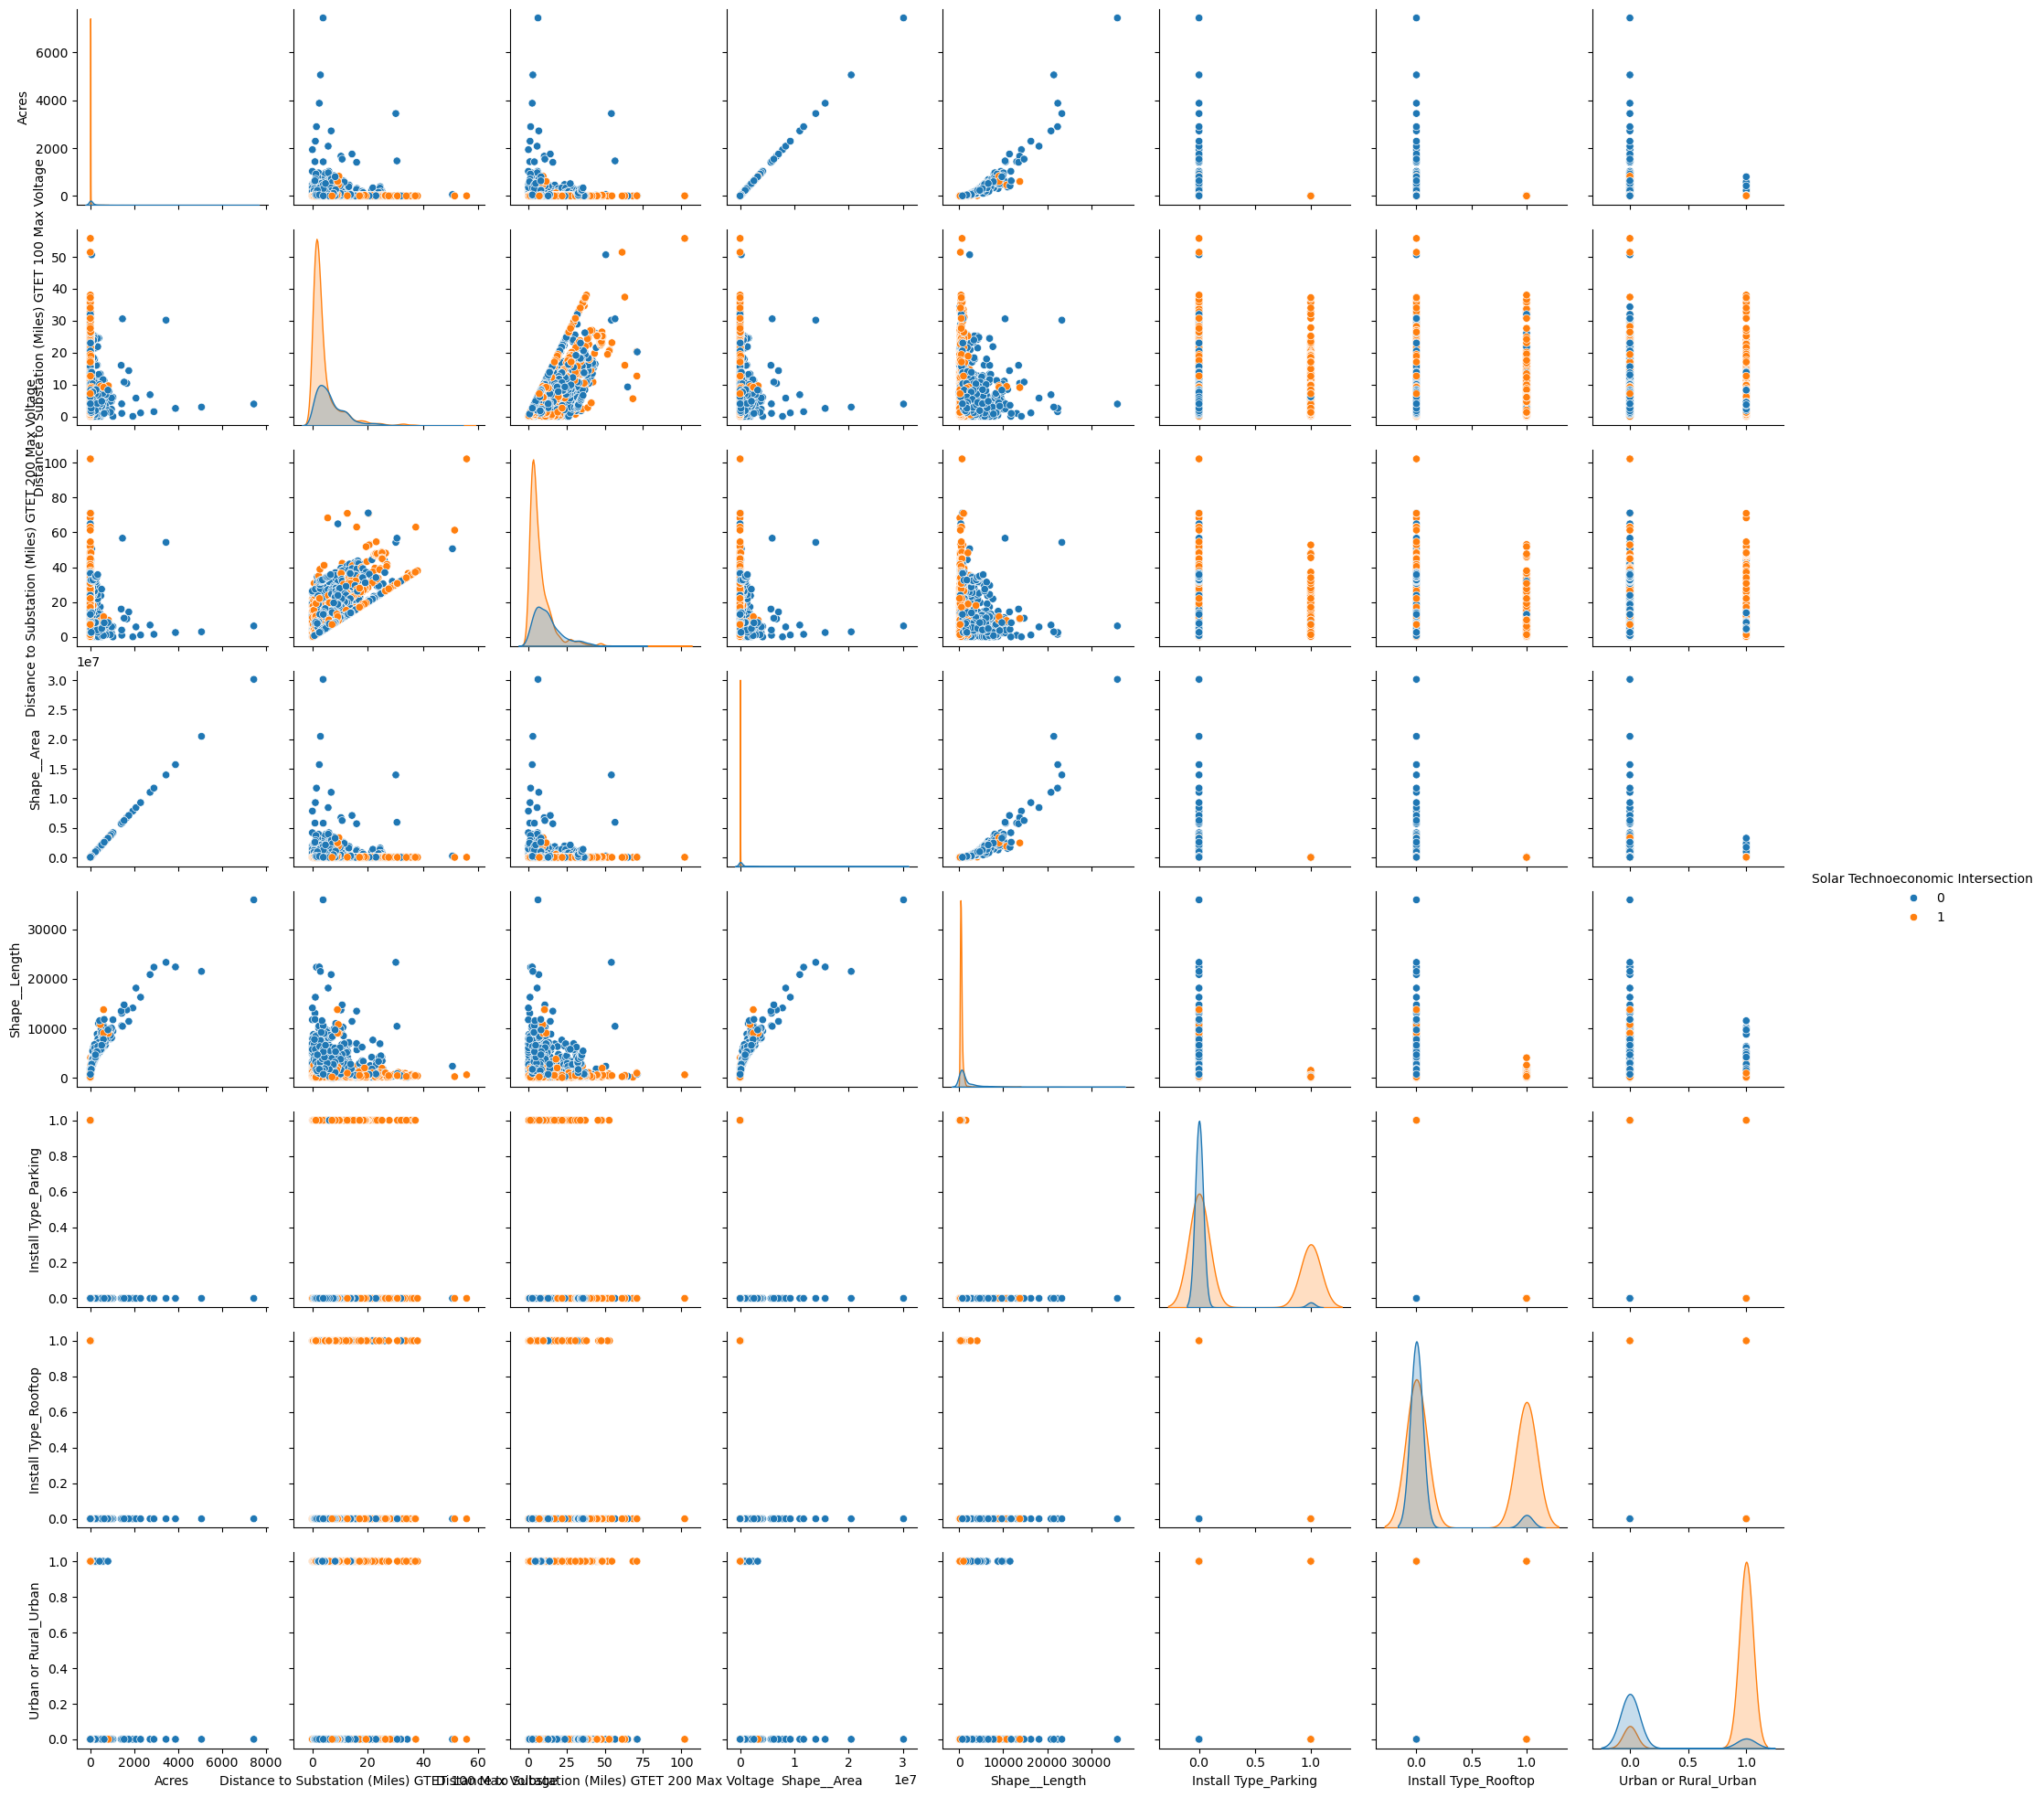

In [15]:
# Scatterplot matrix
sns.pairplot(data, hue='Solar Technoeconomic Intersection')
plt.show()

**Feature Relationships**: The pair plot provides a visual exploration of the relationships between multiple features, showing how they correlate with the target variable.​

**Class Distribution**: The distribution patterns for the two classes provide a clear visual distinction, helping to identify the most impactful predictors for determining site feasibility.

## 7. Splitting the Data into Training and Test Sets

To prepare the data for modeling, we'll split it into training and test sets. We'll use an 70/30 split. The stratify=y parameter ensures that the class distribution of the target variable is maintained in both the training and testing sets, preserving the balance between the classes. This step is critical for training and evaluating the machine learning model under consistent conditions. The sizes of the training and testing sets are printed to confirm the split.

In [46]:
# Separate the target variable and features
X = data.drop(['Solar Technoeconomic Intersection'], axis=1)
y = data['Solar Technoeconomic Intersection']

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

Training set size: 3777 samples
Test set size: 1620 samples


In [47]:
X_train.describe()

,Acres,Distance to Substation (Miles) GTET 100 Max Voltage,Distance to Substation (Miles) GTET 200 Max Voltage,Shape__Area,Shape__Length,Install Type_Parking,Install Type_Rooftop,Urban or Rural_Urban
count,3777.000000,3777.000000,3777.000000,3.777000e+03,3777.000000,3777.000000,3777.000000,3777.000000
mean,30.060897,4.886625,9.034652,1.216524e+05,810.365594,0.258671,0.338364,0.670109
std,211.732788,5.580779,8.857247,8.568535e+05,1636.526634,0.437962,0.473216,0.470236
min,0.007517,0.000000,0.000000,3.042128e+01,34.145689,0.000000,0.000000,0.000000
25%,0.936432,1.372374,3.175614,3.789621e+03,270.286846,0.000000,0.000000,0.000000
50%,2.081881,2.819865,6.266930,8.425105e+03,409.534506,0.000000,0.000000,1.000000
75%,4.839423,6.266930,12.004211,1.958452e+04,646.034233,1.000000,1.000000,1.000000
max,7438.603255,55.746475,102.224911,3.010313e+07,35928.275147,1.000000,1.000000,1.000000


Here, we can see that the data is not standardized from the summary statistics. So in order to standardize the numerical variables, we can use StandardScaler from sklearn.preprocessing. This will scale the numerical features to have a mean of almost 0 and a standard deviation to almost 1.

## 8. Standardizing Variables After Splitting

Differences in scale can adversely affect some machine learning models. We'll standardize numeric variables **after** the data split to prevent data leakage.

In [48]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Identify numerical features in X (excluding the target variable)
numerical_features = X.select_dtypes(include=['number']).columns

# Fit the scaler on the training set and transform the training data
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])

# Use the same scaler to transform the test data
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

In [49]:
X_train.describe()

,Acres,Distance to Substation (Miles) GTET 100 Max Voltage,Distance to Substation (Miles) GTET 200 Max Voltage,Shape__Area,Shape__Length,Install Type_Parking,Install Type_Rooftop,Urban or Rural_Urban
count,3.777000e+03,3.777000e+03,3.777000e+03,3.777000e+03,3777.000000,3.777000e+03,3.777000e+03,3.777000e+03
mean,5.643707e-18,8.465561e-17,-4.585512e-17,9.406179e-18,0.000000,6.019954e-17,-7.524943e-18,-8.089314e-17
std,1.000132e+00,1.000132e+00,1.000132e+00,1.000132e+00,1.000132,1.000132e+00,1.000132e+00,1.000132e+00
min,-1.419589e-01,-8.757329e-01,-1.020164e+00,-1.419590e-01,-0.474372,-5.907018e-01,-7.151256e-01,-1.425237e+00
25%,-1.375711e-01,-6.297895e-01,-6.615841e-01,-1.375713e-01,-0.330059,-5.907018e-01,-7.151256e-01,-1.425237e+00
50%,-1.321605e-01,-3.703844e-01,-3.125224e-01,-1.321606e-01,-0.244960,-5.907018e-01,-7.151256e-01,7.016378e-01
75%,-1.191351e-01,2.473648e-01,3.353132e-01,-1.191352e-01,-0.100428,1.692902e+00,1.398356e+00,7.016378e-01
max,3.499469e+01,9.114603e+00,1.052275e+01,3.499484e+01,21.461649,1.692902e+00,1.398356e+00,7.016378e-01


Here, we can see the mean is almost 0 and standard deviation is 1 for all the columns

In [50]:
y.value_counts()

Solar Technoeconomic Intersection
1    3790
0    1607
Name: count, dtype: int64

Since there is a data imbalance between the target values, lets employ smote!

## 9. Handle Class Imbalance

In [51]:
# Apply SMOTE to handle data imbalance
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [52]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("\nTarget value counts in the original dataset:\n", y_train.value_counts())

X_train shape: (5304, 8)
y_train shape: (5304,)

Target value counts in the original dataset:
 Solar Technoeconomic Intersection
1    2652
0    2652
Name: count, dtype: int64


## Creating  Experiments

We have created 4 experiments, one each to log the models in MLFlow server.

In [ ]:
# Define the experiment name
experiment_name = "Final_Project_Lokesh"
#experiment_name = "Final_Project_Swetha"
#experiment_name = "Final_Project_Yash" 
#experiment_name = "Final_Project_Soujanya_G"

# Set the experiment
mlflow.set_experiment(experiment_name)

<Experiment: artifact_location='mlflow-artifacts:/1', creation_time=1731470033388, experiment_id='1', last_update_time=1731470033388, lifecycle_stage='active', name='Final_Project_Lokesh', tags={}>

## Logistic Regression Model with Hyperparameter Tuning and MLflow Tracking

Here we will train and evaluate a Logistic Regression model with hyperparameter tuning using GridSearchCV to optimize C and solver parameters for maximizing the F1 score. The best model is trained and evaluated on test data, with key performance metrics such as accuracy, precision, recall, F1 score, and ROC AUC calculated. Visualizations including a confusion matrix, ROC curve, Lift chart, and Gains chart are generated to provide insights into the model's classification effectiveness. All metrics, parameters, and artifacts are logged to MLflow, enabling tracking and reproducibility of the model development process.

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

# Define parameter grid for GridSearchCV
param_grid_lr = {
    'C': [0.01, 0.1, 1],  # Regularization parameter
    'solver': ['liblinear', 'lbfgs']  # Solvers for Logistic Regression
}

# Initialize the Logistic Regression model
lr = LogisticRegression(max_iter=1000)

# Use GridSearchCV to find the best hyperparameters
grid_search_lr = GridSearchCV(lr, param_grid_lr, scoring='f1', cv=3)

# Start an MLflow run
with mlflow.start_run(run_name="Logistic Regression Run") as run:
    grid_search_lr.fit(X_train, y_train)
    
    # Get the best model from grid search
    best_lr = grid_search_lr.best_estimator_
    # Log model parameters
    mlflow.log_params(param_grid_lr)
    mlflow.log_param("Best C", best_lr.C)
    mlflow.log_param("Best solver", best_lr.solver)

    # Predict probabilities and labels
    y_pred_proba_lr = best_lr.predict_proba(X_test)
    y_pred_lr = best_lr.predict(X_test)
    
    # Calculate performance metrics with multiclass support
    accuracy_lr = accuracy_score(y_test, y_pred_lr)
    precision_lr = precision_score(y_test, y_pred_lr, average='weighted')
    recall_lr = recall_score(y_test, y_pred_lr, average='weighted')
    f1_lr = f1_score(y_test, y_pred_lr, average='weighted')
    roc_auc_lr = roc_auc_score(y_test, y_pred_proba_lr[:,1])

    # Log metrics
    mlflow.log_metric("accuracy", accuracy_lr)
    mlflow.log_metric("precision", precision_lr)
    mlflow.log_metric("recall", recall_lr)
    mlflow.log_metric("f1_score", f1_lr)
    mlflow.log_metric("roc_auc_score", roc_auc_lr)

    # Log the classification report
    report = classification_report(y_test, y_pred_lr, output_dict=True)
    with open("classification_report_lr.txt", "w") as f:
        f.write(classification_report(y_test, y_pred_lr))
    mlflow.log_artifact("classification_report_lr.txt")

    # Log the model
    input_example = X_train[:1]
    mlflow.sklearn.log_model(best_lr, "LogisticRegression", input_example=input_example)

    # Plot and log the confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title("Confusion Matrix for Logistic Regression on Dataset")
    plt.savefig("confusion_matrix_lr.png")  # Save the figure as a PNG file
    mlflow.log_artifact("confusion_matrix_lr.png")  # Log the confusion matrix image as an artifact
    plt.close()  # Close the figure to free up memory

    # Plot and log the ROC curve for each class (One-vs-Rest)
    plt.figure()
    for i in range(len(best_lr.classes_)):
        fpr, tpr, _ = roc_curve(y_test == best_lr.classes_[i], y_pred_proba_lr[:, i])
        plt.plot(fpr, tpr, label=f'Class {best_lr.classes_[i]} (area = {roc_auc_score(y_test == best_lr.classes_[i], y_pred_proba_lr[:, i]):.2f})')

    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for reference
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve for Logistic Regression on Dataset")
    plt.legend(loc="best")
    plt.savefig("roc_curve_lr.png")  # Save the ROC curve as a PNG file
    mlflow.log_artifact("roc_curve_lr.png")  # Log the ROC curve image as an artifact
    plt.close()  # Close the figure

    # Define a function to calculate lift and gains
    def calculate_lift_and_gains(y_true, pred_probs):
        data = pd.DataFrame({'true': y_true.astype(int), 'pred_prob': pred_probs})
        data = data.sort_values(by='pred_prob', ascending=False).reset_index(drop=True)
        
        # Calculate cumulative gains
        data['cumulative_true'] = data['true'].cumsum()
        data['cumulative_gain'] = data['cumulative_true'] / data['true'].sum()
        # Deciles for lift chart
        total_positives = data['true'].sum()
        data['decile'] = pd.qcut(data.index, 10, labels=False).astype(int)
        lift = data.groupby('decile')['true'].sum() / (total_positives / 10)
        return lift, data['cumulative_gain']

    # Calculate lift and gains for Logistic Regression model
    lr_probs = best_lr.predict_proba(X_test)[:, 1]
    lr_lift, lr_gains = calculate_lift_and_gains(y_test, lr_probs)

    # Plotting Lift Chart for Logistic Regression model
    plt.figure(figsize=(8, 6))
    plt.plot(lr_lift.index + 1, lr_lift.values, marker='o', color='b')
    plt.title("Lift Chart - Logistic Regression")
    plt.xlabel("Decile")
    plt.ylabel("Lift")
    plt.grid(True)
    plt.savefig("lift_chart_lr.png")
    mlflow.log_artifact("lift_chart_lr.png")
    plt.close()

    # Plotting Gains Chart for Logistic Regression model
    plt.figure(figsize=(8, 6))
    plt.plot(np.arange(len(lr_gains)) / len(lr_gains), lr_gains, marker='o', label="Model Gains")
    plt.plot([0, 1], [0, 1], 'k--', label="Random Baseline")
    plt.title("Gains Chart - Logistic Regression")
    plt.xlabel("Fraction of Total Population")
    plt.legend()
    plt.grid(True)
    plt.savefig("gains_chart_lr.png")
    mlflow.log_artifact("gains_chart_lr.png")
    plt.close()


2024/11/15 00:46:21 INFO mlflow.tracking._tracking_service.client: 🏃 View run Logistic Regression Run at: http://131.247.92.12:5010/#/experiments/1/runs/42d7235a228445358fcb7ad5e5db939f.
2024/11/15 00:46:21 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://131.247.92.12:5010/#/experiments/1.


The evaluation of the Logistic Regression model is summarized as follows based on the visualizations logged in the MLFlow server:

1. **Confusion Matrix**: The confusion matrix highlights the model's ability to correctly classify a significant portion of both positive and negative classes, with 1024 True Positives and 429 True Negatives. However, it also reveals 53 False Positives and 114 False Negatives, suggesting some scope for improvement in reducing misclassifications, particularly False Negatives.

2. **Gains Chart**: The gains chart shows that the model performs well above the random baseline, especially in the early deciles. This indicates that the model is effective at prioritizing high-probability positive predictions, making it a strong tool for ranking and resource prioritization.

3. **Lift Chart**: The lift chart demonstrates that the model achieves a lift exceeding 1.4 in the top deciles, showcasing its strong ability to identify positive instances better than random selection. The lift decreases in later deciles, as expected, but still indicates effective ranking performance overall.

4. **ROC Curve**: The ROC curve displays an Area Under the Curve (AUC) of 0.93 for both classes, highlighting excellent class discrimination. The model reliably separates positive and negative classes, achieving a strong balance between sensitivity and specificity.

Overall, the Logistic Regression model exhibits robust classification performance with effective ranking capabilities, particularly evident in the early deciles of the lift and gains charts. Addressing False Negatives could further enhance the model's reliability and impact.

## SVC Model with Hyperparameter Tuning and MLflow Tracking

Here we will train and evaluate Support Vector Classifier (SVC) with hyperparameter tuning using GridSearchCV to optimize the regularization parameter (C), kernel type (linear or rbf), and kernel coefficient (gamma). The best SVC model is trained on the dataset and evaluated on the test set. Key performance metrics, including accuracy, precision, recall, F1 score, and ROC AUC, are calculated and logged to MLflow for tracking. Visualizations such as the confusion matrix, ROC curve, Lift chart, and Gains chart are generated to provide insights into the model’s classification performance and probability ranking effectiveness. All artifacts, including metrics, visualizations, and model parameters, are logged to MLflow, ensuring a reproducible and comprehensive evaluation process.

In [56]:
from sklearn.svm import SVC

# Define parameter grid for GridSearchCV
param_grid_svc = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Kernel types
    'gamma': ['scale', 'auto']  # Kernel coefficient
}

# Initialize the SVC model
svc = SVC(probability=True, max_iter=1000)

# Use GridSearchCV to find the best hyperparameters
grid_search_svc = GridSearchCV(svc, param_grid_svc, scoring='f1', cv=3)

# Start an MLflow run
with mlflow.start_run(run_name="SVC Run") as run:
    grid_search_svc.fit(X_train, y_train)
    
    # Get the best model from grid search
    best_svc = grid_search_svc.best_estimator_
    # Log model parameters
    mlflow.log_params(grid_search_svc.best_params_)

    # Predict probabilities and labels
    y_pred_proba_svc = best_svc.predict_proba(X_test)
    y_pred_svc = best_svc.predict(X_test)
    
    # Ensure y_test is 1D if necessary
    if y_test.ndim > 1:
        y_test = np.argmax(y_test, axis=1)

    # Calculate performance metrics
    accuracy_svc = accuracy_score(y_test, y_pred_svc)
    precision_svc = precision_score(y_test, y_pred_svc, average='weighted')
    recall_svc = recall_score(y_test, y_pred_svc, average='weighted')
    f1_svc = f1_score(y_test, y_pred_svc, average='weighted')
    roc_auc_svc = roc_auc_score(y_test, y_pred_proba_svc[:, 1])

    # Log metrics
    mlflow.log_metric("accuracy", accuracy_svc)
    mlflow.log_metric("precision", precision_svc)
    mlflow.log_metric("recall", recall_svc)
    mlflow.log_metric("f1_score", f1_svc)
    mlflow.log_metric("roc_auc_score", roc_auc_svc)

    # Log the classification report
    report = classification_report(y_test, y_pred_svc, output_dict=True)
    with open("classification_report_svc.txt", "w") as f:
        f.write(classification_report(y_test, y_pred_svc))
    mlflow.log_artifact("classification_report_svc.txt")

    # Log the model
    input_example = X_train[:1]
    mlflow.sklearn.log_model(best_svc, "SVC", input_example=input_example)

    # Plot and log the confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(confusion_matrix(y_test, y_pred_svc), annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title("Confusion Matrix for SVC on Dataset")
    plt.savefig("confusion_matrix_svc.png")
    mlflow.log_artifact("confusion_matrix_svc.png")
    plt.close()

    # Plot and log the ROC curve for each class (One-vs-Rest)
    plt.figure()
    for i in range(len(best_svc.classes_)):
        fpr, tpr, _ = roc_curve(y_test == best_svc.classes_[i], y_pred_proba_svc[:, i])
        plt.plot(fpr, tpr, label=f'Class {best_svc.classes_[i]} (area = {roc_auc_score(y_test == best_svc.classes_[i], y_pred_proba_svc[:, i]):.2f})')

    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for reference
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve for Logistic Regression on Dataset")
    plt.legend(loc="best")
    plt.savefig("roc_curve_svc.png")  # Save the ROC curve as a PNG file
    mlflow.log_artifact("roc_curve_svc.png")  # Log the ROC curve image as an artifact
    plt.close()  # Close the figure

    # Define a function to calculate lift and gains
    def calculate_lift_and_gains(y_true, pred_probs):
        data = pd.DataFrame({'true': y_true.astype(int), 'pred_prob': pred_probs})
        data = data.sort_values(by='pred_prob', ascending=False).reset_index(drop=True)
        
        # Calculate cumulative gains
        data['cumulative_true'] = data['true'].cumsum()
        data['cumulative_gain'] = data['cumulative_true'] / data['true'].sum()
        # Deciles for lift chart
        total_positives = data['true'].sum()
        data['decile'] = pd.qcut(data.index, 10, labels=False).astype(int)
        lift = data.groupby('decile')['true'].sum() / (total_positives / 10)
        return lift, data['cumulative_gain']

    # Calculate lift and gains for SVC model
    svc_probs = y_pred_proba_svc[:, 1]
    svc_lift, svc_gains = calculate_lift_and_gains(y_test, svc_probs)

    # Plotting Lift Chart for SVC model
    plt.figure(figsize=(8, 6))
    svc_lift.plot(marker='o', color='b')
    plt.title("Lift Chart - SVC")
    plt.xlabel("Decile")
    plt.ylabel("Lift")
    plt.grid(True)
    plt.savefig("lift_chart_svc.png")
    mlflow.log_artifact("lift_chart_svc.png")
    plt.close()

    # Plotting Gains Chart for SVC model
    plt.figure(figsize=(8, 6))
    plt.plot(np.arange(len(svc_gains)) / len(svc_gains), svc_gains, marker='o', label="Model Gains")
    plt.plot([0, 1], [0, 1], 'k--', label="Random Baseline")
    plt.title("Gains Chart - SVC")
    plt.xlabel("Fraction of Total Population")
    plt.legend()
    plt.grid(True)
    plt.savefig("gains_chart_svc.png")
    mlflow.log_artifact("gains_chart_svc.png")
    plt.close()


2024/11/15 00:46:58 INFO mlflow.tracking._tracking_service.client: 🏃 View run SVC Run at: http://131.247.92.12:5010/#/experiments/1/runs/62289e1ca7ab4c58be119a6834907803.
2024/11/15 00:46:58 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://131.247.92.12:5010/#/experiments/1.


The evaluation of the SVC model is summarized as follows based on the visualizations logged in the MLFlow server:

1. **Confusion Matrix**: The confusion matrix demonstrates the model's strong performance, with 1040 True Positives and 424 True Negatives. The False Positives (58) and False Negatives (98) are relatively low, showcasing a balanced ability to correctly classify instances across both classes.

2. **Gains Chart**: The gains chart indicates that the model performs significantly better than the random baseline, particularly in the early deciles. This shows the model's effectiveness in prioritizing high-probability predictions, which is crucial for applications requiring ranked outputs.

3. **Lift Chart**: The lift chart highlights that the model achieves a lift greater than 1.4 in the top deciles, confirming its strong predictive power in identifying positive instances. As expected, the lift decreases in later deciles but remains above the baseline for most of the range.

4. **ROC Curve**: The ROC curve illustrates high AUC values for both classes, with an overall AUC close to 0.93. This reflects the model's excellent class discrimination capabilities and reliable separation between positive and negative classes.

Overall, the SVC model exhibits strong performance in classification and ranking tasks, with effective prioritization of high-probability predictions and robust discrimination capabilities across classes.

## KNN Model with Hyperparameter Tuning and MLflow Tracking

Here we will train and evaluate a K-Nearest Neighbors (KNN) classifier with hyperparameter tuning using GridSearchCV to optimize the number of neighbors (n_neighbors), weight functions (uniform or distance), and distance metrics (euclidean or manhattan). The best KNN model is selected based on F1-weighted scoring and is trained on the dataset. Predictions are made for the test set, and key performance metrics, including accuracy, precision, recall, F1 score, and ROC AUC, are calculated. Visualizations such as the confusion matrix, ROC curve, Lift chart, and Gains chart are created to provide insights into the model's classification performance and ranking capabilities. All metrics, visualizations, and model parameters are logged to MLflow, ensuring a comprehensive and reproducible evaluation of the KNN model.


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Define parameter grid for GridSearchCV
param_grid_knn = {
    'n_neighbors': [3, 5, 7],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'metric': ['euclidean', 'manhattan']  # Distance metric
}
 
# Initialize the KNN model
knn = KNeighborsClassifier()
 
# Use GridSearchCV to find the best hyperparameters
grid_search_knn = GridSearchCV(knn, param_grid_knn, scoring='f1_weighted', cv=3)
 
# Start an MLflow run
with mlflow.start_run(run_name="KNN Model Run") as run:
    grid_search_knn.fit(X_train, y_train)
    # Get the best model from grid search
    best_knn = grid_search_knn.best_estimator_
    # Log model parameters
    mlflow.log_params(param_grid_knn)
    mlflow.log_param("Best n_neighbors", best_knn.n_neighbors)
    mlflow.log_param("Best weights", best_knn.weights)
    mlflow.log_param("Best metric", best_knn.metric)
 
    # Predict probabilities and labels
    y_pred_proba_knn = best_knn.predict_proba(X_test)
    y_pred_knn = best_knn.predict(X_test)
    # Calculate performance metrics with multiclass support
    accuracy_knn = accuracy_score(y_test, y_pred_knn)
    precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
    recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
    f1_knn = f1_score(y_test, y_pred_knn, average='weighted')
    roc_auc_knn= roc_auc_score(y_test, y_pred_proba_knn[:,1])
 
    # Log metrics
    mlflow.log_metric("accuracy", accuracy_knn)
    mlflow.log_metric("precision", precision_knn)
    mlflow.log_metric("recall", recall_knn)
    mlflow.log_metric("f1_score", f1_knn)
    mlflow.log_metric("roc_auc_score", roc_auc_knn)
 
    # Log the classification report
    report = classification_report(y_test, y_pred_knn, output_dict=True)
    with open("classification_report_knn.txt", "w") as f:
        f.write(classification_report(y_test, y_pred_knn))
    mlflow.log_artifact("classification_report_knn.txt")
 
    # Log the model
    input_example = X_train[:1]
    mlflow.sklearn.log_model(best_knn, "KNN", input_example=input_example)
 
    # Plot and log the confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title("Confusion Matrix for KNN on Dataset")
    plt.savefig("confusion_matrix_knn.png")  # Save the figure as a PNG file
    mlflow.log_artifact("confusion_matrix_knn.png")  # Log the confusion matrix image as an artifact
    plt.close()  # Close the figure to free up memory
 
    # Plot and log the ROC curve for each class (One-vs-Rest)
    plt.figure()
    for i in range(len(best_knn.classes_)):
        fpr, tpr, _ = roc_curve(y_test == best_knn.classes_[i], y_pred_proba_knn[:, i])
        plt.plot(fpr, tpr, label=f'Class {best_knn.classes_[i]} (area = {roc_auc_score(y_test == best_knn.classes_[i], y_pred_proba_knn[:, i]):.2f})')
 
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for reference
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve for Logistic Regression on Dataset")
    plt.legend(loc="best")
    plt.savefig("roc_curve_knn.png")  # Save the ROC curve as a PNG file
    mlflow.log_artifact("roc_curve_knn.png")  # Log the ROC curve image as an artifact
    plt.close()  # Close the figure

 
    # Define a function to calculate lift and gains
    def calculate_lift_and_gains(y_true, pred_probs):
        data = pd.DataFrame({'true': y_true.astype(int), 'pred_prob': pred_probs})
        data = data.sort_values(by='pred_prob', ascending=False).reset_index(drop=True)
        # Calculate cumulative gains
        data['cumulative_true'] = data['true'].cumsum()
        data['cumulative_gain'] = data['cumulative_true'] / data['true'].sum()
        # Deciles for lift chart
        total_positives = data['true'].sum()
        data['decile'] = pd.qcut(data.index, 10, labels=False).astype(int)
        lift = data.groupby('decile')['true'].sum() / (total_positives / 10)
        return lift, data['cumulative_gain']
 
    # Calculate lift and gains for KNN model
    knn_probs = y_pred_proba_knn[:, 1]  # For binary/multi-class, pick probability of positive class
    knn_lift, knn_gains = calculate_lift_and_gains(y_test, knn_probs)
 
    # Plotting Lift Chart for KNN model
    plt.figure(figsize=(8, 6))
    plt.plot(knn_lift.index + 1, knn_lift.values, marker='o', color='b')
    plt.title("Lift Chart - KNN")
    plt.xlabel("Decile")
    plt.ylabel("Lift")
    plt.grid(True)
    plt.savefig("lift_chart_knn.png")
    mlflow.log_artifact("lift_chart_knn.png")
    plt.close()
 
    # Plotting Gains Chart for KNN model
    plt.figure(figsize=(8, 6))
    plt.plot(np.arange(len(knn_gains)) / len(knn_gains), knn_gains, marker='o', label="Model Gains")
    plt.plot([0, 1], [0, 1], 'k--', label="Random Baseline")
    plt.title("Gains Chart - KNN")
    plt.xlabel("Fraction of Total Population")
    plt.legend()
    plt.grid(True)
    plt.savefig("gains_chart_knn.png")
    mlflow.log_artifact("gains_chart_knn.png")
    plt.close()

The evaluation of the KNN Model Based on Visualizations Logged in the MLFlow Server:

**Confusion Matrix**: The confusion matrix showcases the KNN model's performance with 1040 True Positives and 420 True Negatives. False Positives (62) and False Negatives (98) are relatively low, indicating a well-balanced classification performance across both classes.

**Gains Chart**: The gains chart demonstrates that the KNN model consistently outperforms the random baseline, particularly in the early deciles. This reflects the model’s ability to effectively prioritize high-probability predictions, which is crucial for applications requiring ranked outputs.

**Lift Chart**: The lift chart highlights that the model achieves a lift greater than 1.4 in the top deciles, signifying strong predictive power in identifying positive instances. The lift gradually decreases in later deciles but remains above random performance for most of the range.

**ROC Curve**: The ROC curve indicates high AUC values of approximately 0.93 for both classes, showcasing the model’s excellent class discrimination capabilities. The model reliably separates positive and negative instances, ensuring effective predictions.

Overall, the KNN model delivers reliable classification and ranking performance, excelling in prioritizing high-probability predictions while maintaining strong discrimination across both classes. Its robust performance makes it a suitable choice for this task.

## MLP Model with Hyperparameter Tuning and MLflow Tracking

Here we will train and evaluate a Multilayer Perceptron (MLP) Classifier with hyperparameter tuning using GridSearchCV to optimize parameters such as hidden layer sizes, activation functions (relu or tanh), learning rate strategies (constant or adaptive), and learning rate initialization. The best MLP model is trained on the dataset and evaluated on the test set. Key performance metrics, including accuracy, precision, recall, F1 score, and ROC AUC, are calculated and logged to MLflow for tracking. Visualizations such as the confusion matrix, ROC curve, Lift chart, and Gains chart are generated to provide insights into the model’s classification performance and its ability to rank predictions effectively. All artifacts, including metrics, visualizations, and model parameters, are logged to MLflow, ensuring a reproducible and detailed evaluation process

In [ ]:
from sklearn.neural_network import MLPClassifier
 
mlp  = MLPClassifier(random_state=42, max_iter=700)
 
# Define hyperparameter grid for tuning
param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.001],
    'learning_rate': ['constant', 'adaptive'],
    'learning_rate_init': [0.001, 0.01]
}
# Initialize GridSearchCV
grid_search_mlp = GridSearchCV(estimator=mlp,param_grid=param_grid_mlp,scoring='f1',cv=3, n_jobs=-1,verbose=2
)
 
# Start an MLflow run
with mlflow.start_run(run_name="MLP Model Run") as run:
    grid_search_mlp.fit(X_train, y_train)
    # Get the best model from grid search
    best_mlp = grid_search_mlp.best_estimator_
    # Log model parameters
    mlflow.log_params(param_grid_mlp)
    mlflow.log_param("Best hidden_layer_sizes", best_mlp.hidden_layer_sizes)
    mlflow.log_param("Best activation", best_mlp.activation)
    mlflow.log_param("Best solver", best_mlp.solver)
    mlflow.log_param("Best learning_rate", best_mlp.learning_rate)
 
    # Predict probabilities and labels
    y_pred_proba_mlp = best_mlp.predict_proba(X_test)
    y_pred_mlp = best_mlp.predict(X_test)
    # Calculate performance metrics with multiclass support
    accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
    precision_mlp = precision_score(y_test, y_pred_mlp, average='weighted')
    recall_mlp = recall_score(y_test, y_pred_mlp, average='weighted')
    f1_mlp = f1_score(y_test, y_pred_mlp, average='weighted')
 
    roc_auc_mlp = roc_auc_score(y_test, y_pred_proba_mlp[:,1], multi_class='ovr')
 
    # Log metrics
    mlflow.log_metric("accuracy", accuracy_mlp)
    mlflow.log_metric("precision", precision_mlp)
    mlflow.log_metric("recall", recall_mlp)
    mlflow.log_metric("f1_score", f1_mlp)
    mlflow.log_metric("roc_auc_score", roc_auc_mlp)
 
    # Log the classification report
    report = classification_report(y_test, y_pred_mlp, output_dict=True)
    with open("classification_report_mlp.txt", "w") as f:
        f.write(classification_report(y_test, y_pred_mlp))
    mlflow.log_artifact("classification_report_mlp.txt")
 
    # Log the model
    input_example = X_train[:1]
    mlflow.sklearn.log_model(best_mlp, "MLP", input_example=input_example)
 
    # Plot and log the confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(confusion_matrix(y_test, y_pred_mlp), annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title("Confusion Matrix for MLP on Dataset")
    plt.savefig("confusion_matrix_mlp.png")  # Save the figure as a PNG file
    mlflow.log_artifact("confusion_matrix_mlp.png")  # Log the confusion matrix image as an artifact
    plt.close()  # Close the figure to free up memory
 
    # Plot and log the ROC curve for each class (One-vs-Rest)
    plt.figure()
    for i in range(len(best_mlp.classes_)):
        fpr, tpr, _ = roc_curve(y_test == best_mlp.classes_[i], y_pred_proba_mlp[:, i])
        plt.plot(fpr, tpr, label=f'Class {best_mlp.classes_[i]} (area = {roc_auc_score(y_test == best_mlp.classes_[i], y_pred_proba_mlp[:, i]):.2f})')
 
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for reference
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve for MLP on Dataset")
    plt.legend(loc="best")
    plt.savefig("roc_curve_mlp.png")  # Save the ROC curve as a PNG file
    mlflow.log_artifact("roc_curve_mlp.png")  # Log the ROC curve image as an artifact
    plt.close()  # Close the figure
 
    # Define a function to calculate lift and gains
    def calculate_lift_and_gains(y_true, pred_probs):
        data = pd.DataFrame({'true': y_true.astype(int), 'pred_prob': pred_probs})
        data = data.sort_values(by='pred_prob', ascending=False).reset_index(drop=True)
        # Calculate cumulative gains
        data['cumulative_true'] = data['true'].cumsum()
        data['cumulative_gain'] = data['cumulative_true'] / data['true'].sum()
        # Deciles for lift chart
        total_positives = data['true'].sum()
        data['decile'] = pd.qcut(data.index, 10, labels=False).astype(int)
        lift = data.groupby('decile')['true'].sum() / (total_positives / 10)
        return lift, data['cumulative_gain']
 
    # Calculate lift and gains for MLP model
    mlp_probs = y_pred_proba_mlp[:, 1]  # For binary/multi-class, pick probability of positive class
    mlp_lift, mlp_gains = calculate_lift_and_gains(y_test, mlp_probs)
 
    # Plotting Lift Chart for MLP model
    plt.figure(figsize=(8, 6))
    plt.plot(mlp_lift.index + 1, mlp_lift.values, marker='o', color='b')
    plt.title("Lift Chart - MLP")
    plt.xlabel("Decile")
    plt.ylabel("Lift")
    plt.grid(True)
    plt.savefig("lift_chart_mlp.png")
    mlflow.log_artifact("lift_chart_mlp.png")
    plt.close()
 
    # Plotting Gains Chart for MLP model
    plt.figure(figsize=(8, 6))
    plt.plot(np.arange(len(mlp_gains)) / len(mlp_gains), mlp_gains, marker='o', label="Model Gains")
    plt.plot([0, 1], [0, 1], 'k--', label="Random Baseline")
    plt.title("Gains Chart - MLP")
    plt.xlabel("Fraction of Total Population")
    plt.legend()
    plt.grid(True)
    plt.savefig("gains_chart_mlp.png")
    mlflow.log_artifact("gains_chart_mlp.png")
    plt.close()

The evaluation of the MLP model is summarized as follows based on the visualizations logged in the MLFlow server:

1. **Confusion Matrix**: The confusion matrix reveals the model's strong classification performance, with 1038 True Positives and 397 True Negatives. The False Positives (85) and False Negatives (100) indicate that the model performs well in predicting the correct classes while maintaining a reasonable balance between the two types of misclassifications.

2. **Gains Chart**: The gains chart demonstrates that the model significantly outperforms the random baseline, particularly in the early deciles. This highlights the model's effectiveness in ranking positive predictions, which is essential for prioritizing high-probability instances in real-world applications.

3. **Lift Chart**: The lift chart shows that the model achieves a lift above 1.4 in the top deciles, indicating its strong predictive ability in identifying positive instances more effectively than random selection. As expected, the lift decreases in later deciles but remains above the baseline, reaffirming the model's ranking effectiveness.

4. **ROC Curve**: The ROC curve indicates an AUC of 0.93 for both classes, reflecting the model's excellent capability to distinguish between positive and negative classes. This high AUC value confirms the MLP's reliability in class separation and decision-making.

Overall, the MLP model exhibits robust classification performance, effective prioritization of high-probability predictions, and strong class discrimination capabilities, making it a valuable tool for this classification task.

## KNN Model with Hyperparameter Tuning and MLflow Tracking

This cell trains and evaluates a K-Nearest Neighbors (KNN) Classifier with hyperparameter tuning using GridSearchCV. The optimization focuses on parameters such as the number of neighbors (n_neighbors), weighting methods (uniform or distance), and distance metrics (euclidean or manhattan). The best KNN model is trained on the dataset and evaluated on the test set. Key performance metrics, including accuracy, precision, recall, F1 score, and ROC AUC, are calculated and logged to MLflow for comprehensive experiment tracking. The evaluation process includes generating visualizations such as the confusion matrix to illustrate classification performance, the ROC curve for class discrimination, and lift and gains charts to assess the model's ranking effectiveness. 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Define parameter grid for GridSearchCV
param_grid_knn = {
    'n_neighbors': [3, 5, 7],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'metric': ['euclidean', 'manhattan']  # Distance metric
}
 
# Initialize the KNN model
knn = KNeighborsClassifier()
 
# Use GridSearchCV to find the best hyperparameters
grid_search_knn = GridSearchCV(knn, param_grid_knn, scoring='f1_weighted', cv=3)
 
# Start an MLflow run
with mlflow.start_run(run_name="KNN Model Run") as run:
    grid_search_knn.fit(X_train, y_train)
    # Get the best model from grid search
    best_knn = grid_search_knn.best_estimator_
    # Log model parameters
    mlflow.log_params(param_grid_knn)
    mlflow.log_param("Best n_neighbors", best_knn.n_neighbors)
    mlflow.log_param("Best weights", best_knn.weights)
    mlflow.log_param("Best metric", best_knn.metric)
 
    # Predict probabilities and labels
    y_pred_proba_knn = best_knn.predict_proba(X_test)
    y_pred_knn = best_knn.predict(X_test)
    # Calculate performance metrics with multiclass support
    accuracy_knn = accuracy_score(y_test, y_pred_knn)
    precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
    recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
    f1_knn = f1_score(y_test, y_pred_knn, average='weighted')
    roc_auc_knn= roc_auc_score(y_test, y_pred_proba_knn[:,1])
 
    # Log metrics
    mlflow.log_metric("accuracy", accuracy_knn)
    mlflow.log_metric("precision", precision_knn)
    mlflow.log_metric("recall", recall_knn)
    mlflow.log_metric("f1_score", f1_knn)
    mlflow.log_metric("roc_auc_score", roc_auc_knn)
 
    # Log the classification report
    report = classification_report(y_test, y_pred_knn, output_dict=True)
    with open("classification_report_knn.txt", "w") as f:
        f.write(classification_report(y_test, y_pred_knn))
    mlflow.log_artifact("classification_report_knn.txt")
 
    # Log the model
    input_example = X_train[:1]
    mlflow.sklearn.log_model(best_knn, "KNN", input_example=input_example)
 
    # Plot and log the confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title("Confusion Matrix for KNN on Dataset")
    plt.savefig("confusion_matrix_knn.png")  # Save the figure as a PNG file
    mlflow.log_artifact("confusion_matrix_knn.png")  # Log the confusion matrix image as an artifact
    plt.close()  # Close the figure to free up memory
 
    # Plot and log the ROC curve for each class (One-vs-Rest)
    plt.figure()
    for i in range(len(best_knn.classes_)):
        fpr, tpr, _ = roc_curve(y_test == best_knn.classes_[i], y_pred_proba_knn[:, i])
        plt.plot(fpr, tpr, label=f'Class {best_knn.classes_[i]} (area = {roc_auc_score(y_test == best_knn.classes_[i], y_pred_proba_knn[:, i]):.2f})')
 
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for reference
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve for Logistic Regression on Dataset")
    plt.legend(loc="best")
    plt.savefig("roc_curve_knn.png")  # Save the ROC curve as a PNG file
    mlflow.log_artifact("roc_curve_knn.png")  # Log the ROC curve image as an artifact
    plt.close()  # Close the figure

 
    # Define a function to calculate lift and gains
    def calculate_lift_and_gains(y_true, pred_probs):
        data = pd.DataFrame({'true': y_true.astype(int), 'pred_prob': pred_probs})
        data = data.sort_values(by='pred_prob', ascending=False).reset_index(drop=True)
        # Calculate cumulative gains
        data['cumulative_true'] = data['true'].cumsum()
        data['cumulative_gain'] = data['cumulative_true'] / data['true'].sum()
        # Deciles for lift chart
        total_positives = data['true'].sum()
        data['decile'] = pd.qcut(data.index, 10, labels=False).astype(int)
        lift = data.groupby('decile')['true'].sum() / (total_positives / 10)
        return lift, data['cumulative_gain']
 
    # Calculate lift and gains for KNN model
    knn_probs = y_pred_proba_knn[:, 1]  # For binary/multi-class, pick probability of positive class
    knn_lift, knn_gains = calculate_lift_and_gains(y_test, knn_probs)
 
    # Plotting Lift Chart for KNN model
    plt.figure(figsize=(8, 6))
    plt.plot(knn_lift.index + 1, knn_lift.values, marker='o', color='b')
    plt.title("Lift Chart - KNN")
    plt.xlabel("Decile")
    plt.ylabel("Lift")
    plt.grid(True)
    plt.savefig("lift_chart_knn.png")
    mlflow.log_artifact("lift_chart_knn.png")
    plt.close()
 
    # Plotting Gains Chart for KNN model
    plt.figure(figsize=(8, 6))
    plt.plot(np.arange(len(knn_gains)) / len(knn_gains), knn_gains, marker='o', label="Model Gains")
    plt.plot([0, 1], [0, 1], 'k--', label="Random Baseline")
    plt.title("Gains Chart - KNN")
    plt.xlabel("Fraction of Total Population")
    plt.legend()
    plt.grid(True)
    plt.savefig("gains_chart_knn.png")
    mlflow.log_artifact("gains_chart_knn.png")
    plt.close()

The evaluation of the KNN model is summarized as follows based on the visualizations logged in the MLFlow server:

1. **Confusion Matrix**: The confusion matrix demonstrates the KNN model's classification performance with 1040 True Positives and 420 True Negatives. False Positives (62) and False Negatives (98) are relatively low, indicating the model’s balanced classification capability for both classes.

2. **Gains Chart**: The gains chart highlights the KNN model's ability to outperform the random baseline effectively, particularly in the early deciles. This suggests the model is efficient in prioritizing high-probability positive predictions, which is vital for targeted decision-making.

3. **Lift Chart**: The lift chart shows that the model achieves a lift of over 1.4 in the top deciles, reflecting strong predictive power in identifying positive instances. As the deciles progress, the lift gradually decreases but remains above the random baseline across most of the range.

4. **ROC Curve**: The ROC curve indicates high AUC values of 0.93 for both classes, signifying excellent discriminatory ability. The model effectively differentiates between positive and negative classes, ensuring reliable predictions.

Overall, the KNN model delivers strong classification and ranking performance, efficiently prioritizing high-probability predictions while maintaining consistent discrimination across classes. Its ability to balance accuracy and ranking effectiveness makes it a dependable choice for this project.


## Random Forest Model with Hyperparameter Tuning and MLflow Tracking

Here we train and evaluate a Random Forest Classifier with hyperparameter tuning using GridSearchCV to optimize parameters such as the number of estimators, splitting criteria (Gini or Entropy), maximum tree depth, and minimum samples for splits and leaves. The best model is selected and evaluated on the test set, with metrics including accuracy, precision, recall, F1 score, and ROC AUC logged to MLflow for tracking. Visualizations like the confusion matrix, ROC curve, Lift chart, and Gains chart are generated to assess the model's classification performance and ranking effectiveness. All model parameters, metrics, and artifacts are logged to MLflow to ensure reproducibility and a detailed evaluation process.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
 
# Define parameter grid for GridSearchCV
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'criterion': ['gini', 'entropy'],
    'max_depth': range(3, 14, 2),
    'min_samples_split': range(4, 11, 2),
    'min_samples_leaf': [3, 4, 5]
}
 
# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)
 
# Use GridSearchCV to find the best hyperparameters
grid_search_rf = GridSearchCV(rf, param_grid_rf, scoring='f1', cv=3)
 
# Start an MLflow run
with mlflow.start_run(run_name="Random Forest Model Run1") as run:
    grid_search_rf.fit(X_train, y_train)
    # Get the best model from grid search
    best_rf = grid_search_rf.best_estimator_
    # Log model parameters
    mlflow.log_params(param_grid_rf)
    mlflow.log_param("Best n_estimators", best_rf.n_estimators)
    mlflow.log_param("Best max_depth", best_rf.max_depth)
    mlflow.log_param("Best min_samples_split", best_rf.min_samples_split)
 
    # Predict probabilities and labels
    y_pred_proba_rf = best_rf.predict_proba(X_test)
    y_pred_rf = best_rf.predict(X_test)
 
    # Calculate performance metrics with multiclass support
    accuracy_rf = accuracy_score(y_test, y_pred_rf)
    precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
    recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
    f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
    roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf[:, 1])
 
    # Log metrics
    mlflow.log_metric("accuracy", accuracy_rf)
    mlflow.log_metric("precision", precision_rf)
    mlflow.log_metric("recall", recall_rf)
    mlflow.log_metric("f1_score", f1_rf)
    mlflow.log_metric("roc_auc_score", roc_auc_rf)
 
    # Log the classification report
    report = classification_report(y_test, y_pred_rf, output_dict=True)
    with open("classification_report_rf.txt", "w") as f:
        f.write(classification_report(y_test, y_pred_rf))
    mlflow.log_artifact("classification_report_rf.txt")
 
    # Log the model
    input_example = X_train[:1]
    mlflow.sklearn.log_model(best_rf, "RandomForestClassifier", input_example=input_example)
 
    # Plot and log the confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title("Confusion Matrix for Random Forest on Dataset")
    plt.savefig("confusion_matrix_rf.png")  # Save the figure as a PNG file
    mlflow.log_artifact("confusion_matrix_rf.png")  # Log the confusion matrix image as an artifact
    plt.close()  # Close the figure to free up memory
 
    # Plot and log the ROC curve for each class (One-vs-Rest)
    plt.figure()
    for i in range(len(best_rf.classes_)):
        fpr, tpr, _ = roc_curve(y_test == best_rf.classes_[i], y_pred_proba_rf[:, i])
        plt.plot(fpr, tpr, label=f'Class {best_rf.classes_[i]} (area = {roc_auc_score(y_test == best_rf.classes_[i], y_pred_proba_rf[:, i]):.2f})')
 
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for reference
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve for Random Forest on Dataset")
    plt.legend(loc="best")
    plt.savefig("roc_curve_rf.png")  # Save the ROC curve as a PNG file
    mlflow.log_artifact("roc_curve_rf.png")  # Log the ROC curve image as an artifact
    plt.close()  # Close the figure
 
    # Define a function to calculate lift and gains
    def calculate_lift_and_gains(y_true, pred_probs):
        data = pd.DataFrame({'true': y_true.astype(int), 'pred_prob': pred_probs})
        data = data.sort_values(by='pred_prob', ascending=False).reset_index(drop=True)
        # Calculate cumulative gains
        data['cumulative_true'] = data['true'].cumsum()
        data['cumulative_gain'] = data['cumulative_true'] / data['true'].sum()
        # Deciles for lift chart
        total_positives = data['true'].sum()
        data['decile'] = pd.qcut(data.index, 10, labels=False).astype(int)
        lift = data.groupby('decile')['true'].sum() / (total_positives / 10)
        return lift, data['cumulative_gain']
 
    # Calculate lift and gains for Random Forest model
    rf_probs = best_rf.predict_proba(X_test)[:, 1]
    rf_lift, rf_gains = calculate_lift_and_gains(y_test, rf_probs)
 
    # Plotting Lift Chart for Random Forest model
    plt.figure(figsize=(8, 6))
    plt.plot(rf_lift.index + 1, rf_lift.values, marker='o', color='b')
    plt.title("Lift Chart - Random Forest")
    plt.xlabel("Decile")
    plt.ylabel("Lift")
    plt.grid(True)
    plt.savefig("lift_chart_rf.png")
    mlflow.log_artifact("lift_chart_rf.png")
    plt.close()
 
    # Plotting Gains Chart for Random Forest model
    plt.figure(figsize=(8, 6))
    plt.plot(np.arange(len(rf_gains)) / len(rf_gains), rf_gains, marker='o', label="Model Gains")
    plt.plot([0, 1], [0, 1], 'k--', label="Random Baseline")
    plt.title("Gains Chart - Random Forest")
    plt.xlabel("Fraction of Total Population")
    plt.legend()
    plt.grid(True)
    plt.savefig("gains_chart_rf.png")
    mlflow.log_artifact("gains_chart_rf.png")
    plt.close()

The evaluation of the Random Forest model is summarized as follows based on the visualizations logged in the MLFlow server:

1. **Confusion Matrix**: The confusion matrix indicates the model's robust performance, with 1033 True Positives and 431 True Negatives. False Positives (51) and False Negatives (105) are relatively low, showcasing a strong ability to accurately classify instances across both classes.

2. **Gains Chart**: The gains chart illustrates that the model significantly surpasses the random baseline, especially in the early deciles. This reflects the model's capability to effectively rank predictions, prioritizing instances with higher probabilities of being positive.

3. **Lift Chart**: The lift chart reveals that the model achieves a lift greater than 1.4 in the top deciles, demonstrating strong predictive accuracy in identifying positive instances. As expected, the lift decreases in later deciles but remains above random performance for most of the range.

4. **ROC Curve**: The ROC curve shows high AUC values of 0.94 for both classes, reflecting excellent discrimination between positive and negative classes. The model consistently achieves reliable separation and prediction accuracy.

Overall, the Random Forest model provides robust classification and ranking capabilities, balancing precision and recall effectively while prioritizing high-probability positive predictions. The strong lift and gains reinforce its utility in real-world applications requiring ranked outputs and class separation.

## Decision Tree Model with Hyperparameter Tuning and MLflow Tracking

Here we will train and evaluate a Decision Tree Classifier with hyperparameter tuning using GridSearchCV to optimize parameters such as the splitting criterion (gini or entropy), maximum tree depth, minimum samples required for a split, and minimum samples per leaf. The best Decision Tree model is trained on the dataset and evaluated on the test set. Key performance metrics, including accuracy, precision, recall, F1 score, and ROC AUC, are calculated and logged to MLflow for tracking. Visualizations such as the confusion matrix, ROC curve, Lift chart, and Gains chart are generated to provide insights into the model's classification performance and its effectiveness in ranking predictions. All artifacts, including metrics, visualizations, and model parameters, are logged to MLflow, ensuring a reproducible and comprehensive evaluation process.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Define parameter grid for GridSearchCV for Decision Tree
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(3, 25, 2),
    'min_samples_split': range(4, 11, 2),
    'min_samples_leaf': [3, 4, 5, 6, 7, 8, 9]
}

# Initialize the Decision Tree model
dt = DecisionTreeClassifier(random_state=42)

# Use GridSearchCV to find the best hyperparameters
grid_search_dt = GridSearchCV(dt, param_grid_dt, scoring='f1', cv=3)

# Start an MLflow run for Decision Tree
with mlflow.start_run(run_name="Decision Tree Run") as run:
    grid_search_dt.fit(X_train, y_train)
    
    # Get the best model from grid search
    best_dt = grid_search_dt.best_estimator_
    # Log model parameters
    mlflow.log_params(grid_search_dt.best_params_)

    # Predict probabilities and labels
    y_pred_proba_dt = best_dt.predict_proba(X_test)
    y_pred_dt = best_dt.predict(X_test)
    
    # Calculate performance metrics
    accuracy_dt = accuracy_score(y_test, y_pred_dt)
    precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
    recall_dt = recall_score(y_test, y_pred_dt, average='weighted')
    f1_dt = f1_score(y_test, y_pred_dt, average='weighted')
    roc_auc_dt = roc_auc_score(y_test, y_pred_proba_dt[:, 1])

    # Log metrics
    mlflow.log_metric("accuracy", accuracy_dt)
    mlflow.log_metric("precision", precision_dt)
    mlflow.log_metric("recall", recall_dt)
    mlflow.log_metric("f1_score", f1_dt)
    mlflow.log_metric("roc_auc_score", roc_auc_dt)

    # Log the classification report
    report = classification_report(y_test, y_pred_dt, output_dict=True)
    with open("classification_report_dt.txt", "w") as f:
        f.write(classification_report(y_test, y_pred_dt))
    mlflow.log_artifact("classification_report_dt.txt")

    # Log the model
    input_example = X_train[:1]
    mlflow.sklearn.log_model(best_dt, "DecisionTree", input_example=input_example)

    # Plot and log the confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title("Confusion Matrix for Decision Tree on Dataset")
    plt.savefig("confusion_matrix_dt.png")
    mlflow.log_artifact("confusion_matrix_dt.png")
    plt.close()

    # Plot and log the ROC curve for each class (One-vs-Rest)
    plt.figure()
    for i in range(len(best_dt.classes_)):
        fpr, tpr, _ = roc_curve(y_test == best_dt.classes_[i], y_pred_proba_dt[:, i])
        plt.plot(fpr, tpr, label=f'Class {best_dt.classes_[i]} (area = {roc_auc_score(y_test == best_dt.classes_[i], y_pred_proba_dt[:, i]):.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve for Decision Tree on Dataset")
    plt.legend(loc="best")
    plt.savefig("roc_curve_dt.png")
    mlflow.log_artifact("roc_curve_dt.png")
    plt.close()

    # Define a function to calculate lift and gains
    def calculate_lift_and_gains(y_true, pred_probs):
        data = pd.DataFrame({'true': y_true.astype(int), 'pred_prob': pred_probs})
        data = data.sort_values(by='pred_prob', ascending=False).reset_index(drop=True)
        # Calculate cumulative gains
        data['cumulative_true'] = data['true'].cumsum()
        data['cumulative_gain'] = data['cumulative_true'] / data['true'].sum()
        # Deciles for lift chart
        total_positives = data['true'].sum()
        data['decile'] = pd.qcut(data.index, 10, labels=False).astype(int)
        lift = data.groupby('decile')['true'].sum() / (total_positives / 10)
        return lift, data['cumulative_gain']
 
    # Calculate lift and gains for Random Forest model
    dt_probs = best_dt.predict_proba(X_test)[:, 1]
    dt_lift, dt_gains = calculate_lift_and_gains(y_test, dt_probs)
 
    # Plotting Lift Chart for Random Forest model
    plt.figure(figsize=(8, 6))
    plt.plot(dt_lift.index + 1, dt_lift.values, marker='o', color='b')
    plt.title("Lift Chart - Random Forest")
    plt.xlabel("Decile")
    plt.ylabel("Lift")
    plt.grid(True)
    plt.savefig("lift_chart_rf.png")
    mlflow.log_artifact("lift_chart_rf.png")
    plt.close()
 
    # Plotting Gains Chart for Random Forest model
    plt.figure(figsize=(8, 6))
    plt.plot(np.arange(len(dt_gains)) / len(dt_gains), dt_gains, marker='o', label="Model Gains")
    plt.plot([0, 1], [0, 1], 'k--', label="Random Baseline")
    plt.title("Gains Chart - Random Forest")
    plt.xlabel("Fraction of Total Population")
    plt.legend()
    plt.grid(True)
    plt.savefig("gains_chart_rf.png")
    mlflow.log_artifact("gains_chart_rf.png")
    plt.close()

The evaluation of the Decision Tree model is summarized as follows based on the visualizations logged in the MLFlow server:

1. **Confusion Matrix**: The confusion matrix highlights the model's performance, with 1035 True Positives and 415 True Negatives. False Positives (67) and False Negatives (103) are relatively low, demonstrating a balanced classification performance across both classes.

2. **Gains Chart**: The gains chart shows that the model significantly outperforms the random baseline, particularly in the early deciles. This indicates the model’s capability to effectively prioritize high-probability positive predictions, making it suitable for applications requiring targeted insights.

3. **Lift Chart**: The lift chart reveals that the model achieves a lift greater than 1.4 in the top deciles, showcasing strong predictive power in identifying positive instances. As expected, the lift decreases in later deciles but remains above random performance throughout most of the range.

4. **ROC Curve**: The ROC curve demonstrates high AUC values of 0.92 for both classes, reflecting strong class discrimination capabilities. The model effectively separates positive and negative classes, ensuring consistent and reliable predictions.

Overall, the Decision Tree model demonstrates reliable classification and ranking performance, with effective prioritization of high-probability predictions and robust discrimination across both classes. This makes it a practical and interpretable solution for the given classification task.

## AdaBoost Model with Hyperparameter Tuning and MLflow Tracking

Here we will train and evaluate a AdaBoost model with hyperparameter tuning using GridSearchCV to optimize n_estimators and learning_rate parameters to maximize the F1 score. The best model is evaluated on test data, and performance metrics like accuracy, precision, recall, F1 score, and ROC AUC are computed. Visualizations such as a confusion matrix, ROC curve, Lift chart, and Gains chart are generated, and all metrics and artifacts are logged to MLflow for tracking and reproducibility.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Define parameter grid for GridSearchCV for AdaBoost
param_grid_ab = {
    'n_estimators': [50, 100, 150],  # Number of estimators
    'learning_rate': [0.01, 0.1, 1]  # Learning rate
}

# Initialize the AdaBoost model
ab = AdaBoostClassifier(random_state=42)

# Use GridSearchCV to find the best hyperparameters
grid_search_ab = GridSearchCV(ab, param_grid_ab, scoring='f1', cv=3)

# Start an MLflow run for AdaBoost
with mlflow.start_run(run_name="AdaBoost Run") as run:
    grid_search_ab.fit(X_train, y_train)
    
    # Get the best model from grid search
    best_ab = grid_search_ab.best_estimator_
    # Log model parameters
    mlflow.log_params(grid_search_ab.best_params_)

    # Predict probabilities and labels
    y_pred_proba_ab = best_ab.predict_proba(X_test)
    y_pred_ab = best_ab.predict(X_test)
    
    # Calculate performance metrics
    accuracy_ab = accuracy_score(y_test, y_pred_ab)
    precision_ab = precision_score(y_test, y_pred_ab, average='weighted')
    recall_ab = recall_score(y_test, y_pred_ab, average='weighted')
    f1_ab = f1_score(y_test, y_pred_ab, average='weighted')
    roc_auc_ab = roc_auc_score(y_test, y_pred_proba_ab[:, 1])
    # Log metrics
    mlflow.log_metric("accuracy", accuracy_ab)
    mlflow.log_metric("precision", precision_ab)
    mlflow.log_metric("recall", recall_ab)
    mlflow.log_metric("f1_score", f1_ab)
    mlflow.log_metric("roc_auc_score", roc_auc_ab)

    # Log the classification report
    report = classification_report(y_test, y_pred_ab, output_dict=True)
    with open("classification_report_ab.txt", "w") as f:
        f.write(classification_report(y_test, y_pred_ab))
    mlflow.log_artifact("classification_report_ab.txt")

    # Log the model
    input_example = X_train[:1]
    mlflow.sklearn.log_model(best_ab, "AdaBoost", input_example=input_example)

    # Plot and log the confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(confusion_matrix(y_test, y_pred_ab), annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title("Confusion Matrix for AdaBoost on Dataset")
    plt.savefig("confusion_matrix_ab.png")
    mlflow.log_artifact("confusion_matrix_ab.png")
    plt.close()
    
    # Plot and log the ROC curve for each class (One-vs-Rest)
    plt.figure()
    for i in range(len(best_ab.classes_)):
        fpr, tpr, _ = roc_curve(y_test == best_ab.classes_[i], y_pred_proba_ab[:, i])
        plt.plot(fpr, tpr, label=f'Class {best_ab.classes_[i]} (area = {roc_auc_score(y_test == best_ab.classes_[i], y_pred_proba_ab[:, i]):.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve for AdaBoost on Dataset")
    plt.legend(loc="best")
    plt.savefig("roc_curve_ab.png")
    mlflow.log_artifact("roc_curve_ab.png")
    plt.close()
    # Calculate lift and gains for AdaBoost model
    ab_probs = y_pred_proba_ab[:, 1]
    ab_lift, ab_gains = calculate_lift_and_gains(y_test, ab_probs)

    # Plotting Lift Chart for AdaBoost model
    plt.figure(figsize=(8, 6))
    plt.plot(ab_lift.index + 1, ab_lift.values, marker='o', color='b')
    plt.title("Lift Chart - AdaBoost")
    plt.xlabel("Decile")
    plt.ylabel("Lift")
    plt.grid(True)
    plt.savefig("lift_chart_ab.png")
    mlflow.log_artifact("lift_chart_ab.png")
    plt.close()

    # Plotting Gains Chart for AdaBoost model
    plt.figure(figsize=(8, 6))
    plt.plot(np.arange(len(ab_gains)) / len(ab_gains), ab_gains, marker='o', label="Model Gains")
    plt.plot([0, 1], [0, 1], 'k--', label="Random Baseline")
    plt.title("Gains Chart - AdaBoost")
    plt.xlabel("Fraction of Total Population")
    plt.legend()
    plt.grid(True)
    plt.savefig("gains_chart_ab.png")
    mlflow.log_artifact("gains_chart_ab.png")
    plt.close()

The evaluation of the AdaBoost model is summarized as follows based on the visualizations logged in the MLFlow server:

1. **Confusion Matrix**: The confusion matrix illustrates the model's classification performance, with 1027 True Positives and 425 True Negatives. The False Positives (57) and False Negatives (111) are relatively low, demonstrating balanced and effective classification across both classes.

2. **Gains Chart**: The gains chart reveals that the model significantly surpasses the random baseline, especially in the early deciles. This underscores the model's ability to prioritize high-probability positive predictions effectively, which is essential for decision-making in critical applications.

3. **Lift Chart**: The lift chart showcases that the model achieves a lift greater than 1.4 in the top deciles, reflecting its strong predictive power in identifying positive instances. While the lift decreases in the later deciles, it remains above random performance for most of the range.

4. **ROC Curve**: The ROC curve demonstrates high AUC values of 0.93 for both classes, indicating excellent discrimination capabilities. The model effectively separates positive and negative classes, ensuring reliable and consistent predictions.

Overall, the AdaBoost model demonstrates robust classification and ranking performance, excelling in prioritizing high-probability predictions and maintaining strong class separation. Its balanced accuracy and predictive ranking make it a reliable choice for this classification task.

## XGBoost Model with Hyperparameter Tuning and MLflow Tracking

The XGBoost model is trained and evaluated with hyperparameter tuning using GridSearchCV to optimize n_estimators, learning_rate, and max_depth parameters for maximizing the F1 score. The best model is evaluated on test data, and metrics such as accuracy, precision, recall, F1 score, and ROC AUC are calculated. Visualizations including a confusion matrix, ROC curve, Lift chart, and Gains chart are generated, with all metrics and artifacts logged to MLflow for easy tracking and reproducibility.

In [ ]:
from xgboost import XGBClassifier

# Define parameter grid for GridSearchCV for XGBoost
param_grid_xgb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 7]
}

# Initialize the XGBoost model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Use GridSearchCV to find the best hyperparameters
grid_search_xgb = GridSearchCV(xgb, param_grid_xgb, scoring='f1', cv=3)

# Start an MLflow run for XGBoost
with mlflow.start_run(run_name="XGBoost Run") as run:
    grid_search_xgb.fit(X_train, y_train)
    # Get the best model from grid search
    best_xgb = grid_search_xgb.best_estimator_
    # Log model parameters
    mlflow.log_params(grid_search_xgb.best_params_)

    # Predict probabilities and labels
    y_pred_proba_xgb = best_xgb.predict_proba(X_test)
    y_pred_xgb = best_xgb.predict(X_test)
    
    # Calculate performance metrics
    accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
    precision_xgb = precision_score(y_test, y_pred_xgb, average='weighted')
    recall_xgb = recall_score(y_test, y_pred_xgb, average='weighted')
    f1_xgb = f1_score(y_test, y_pred_xgb, average='weighted')
    roc_auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb[:, 1])

    # Log metrics
    mlflow.log_metric("accuracy", accuracy_xgb)
    mlflow.log_metric("precision", precision_xgb)
    mlflow.log_metric("recall", recall_xgb)
    mlflow.log_metric("f1_score", f1_xgb)
    mlflow.log_metric("roc_auc_score", roc_auc_xgb)

    # Log the classification report
    report = classification_report(y_test, y_pred_xgb, output_dict=True)
    with open("classification_report_xgb.txt", "w") as f:
        f.write(classification_report(y_test, y_pred_xgb))
    mlflow.log_artifact("classification_report_xgb.txt")

    # Log the model
    input_example = X_train[:1]
    mlflow.sklearn.log_model(best_xgb, "XGBoost", input_example=input_example)
    # Plot and log the confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title("Confusion Matrix for XGBoost on Dataset")
    plt.savefig("confusion_matrix_xgb.png")
    mlflow.log_artifact("confusion_matrix_xgb.png")
    plt.close()

    # Plot and log the ROC curve for each class (One-vs-Rest)
    plt.figure()
    for i in range(len(best_xgb.classes_)):
        fpr, tpr, _ = roc_curve(y_test == best_xgb.classes_[i], y_pred_proba_xgb[:, i])
        plt.plot(fpr, tpr, label=f'Class {best_xgb.classes_[i]} (area = {roc_auc_score(y_test == best_xgb.classes_[i], y_pred_proba_xgb[:, i]):.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve for XGBoost on Dataset")
    plt.legend(loc="best")
    plt.savefig("roc_curve_xgb.png")
    mlflow.log_artifact("roc_curve_xgb.png")
    plt.close()

    # Calculate lift and gains for XGBoost model
    xgb_probs = y_pred_proba_xgb[:, 1]
    xgb_lift, xgb_gains = calculate_lift_and_gains(y_test, xgb_probs)
    # Plotting Lift Chart for XGBoost model
    plt.figure(figsize=(8, 6))
    plt.plot(xgb_lift.index + 1, xgb_lift.values, marker='o', color='b')
    plt.title("Lift Chart - XGBoost")
    plt.xlabel("Decile")
    plt.ylabel("Lift")
    plt.grid(True)
    plt.savefig("lift_chart_xgb.png")
    mlflow.log_artifact("lift_chart_xgb.png")
    plt.close()

    # Plotting Gains Chart for XGBoost model
    plt.figure(figsize=(8, 6))
    plt.plot(np.arange(len(xgb_gains)) / len(xgb_gains), xgb_gains, marker='o', label="Model Gains")
    plt.plot([0, 1], [0, 1], 'k--', label="Random Baseline")
    plt.title("Gains Chart - XGBoost")
    plt.xlabel("Fraction of Total Population")
    plt.legend()
    plt.grid(True)
    plt.savefig("gains_chart_xgb.png")
    mlflow.log_artifact("gains_chart_xgb.png")
    plt.close()

The evaluation of the XGBoost model is summarized as follows based on the visualizations logged in the MLFlow server:

1. **Confusion Matrix**: The confusion matrix highlights the model's performance with 1039 True Positives and 413 True Negatives. The False Positives (69) and False Negatives (99) are relatively low, indicating a well-balanced classification performance across both classes.

2. **Gains Chart**: The gains chart shows that the model significantly outperforms the random baseline, particularly in the early deciles. This demonstrates the model’s ability to prioritize high-probability positive predictions effectively, making it suitable for tasks requiring targeted decision-making.

3. **Lift Chart**: The lift chart reveals that the model achieves a lift greater than 1.4 in the top deciles, confirming its strong predictive power in identifying positive instances. As expected, the lift decreases in later deciles but remains above random performance across most of the range.

4. **ROC Curve**: The ROC curve demonstrates high AUC values of 0.94 for both classes, indicating excellent class discrimination capabilities. The model effectively separates positive and negative classes, ensuring reliable and robust predictions.

Overall, the XGBoost model exhibits strong classification and ranking performance, with effective prioritization of high-probability predictions and consistent discrimination across both classes. The model’s ability to balance accuracy and ranking effectiveness makes it a reliable solution for this task.

## Summary from the Metrics
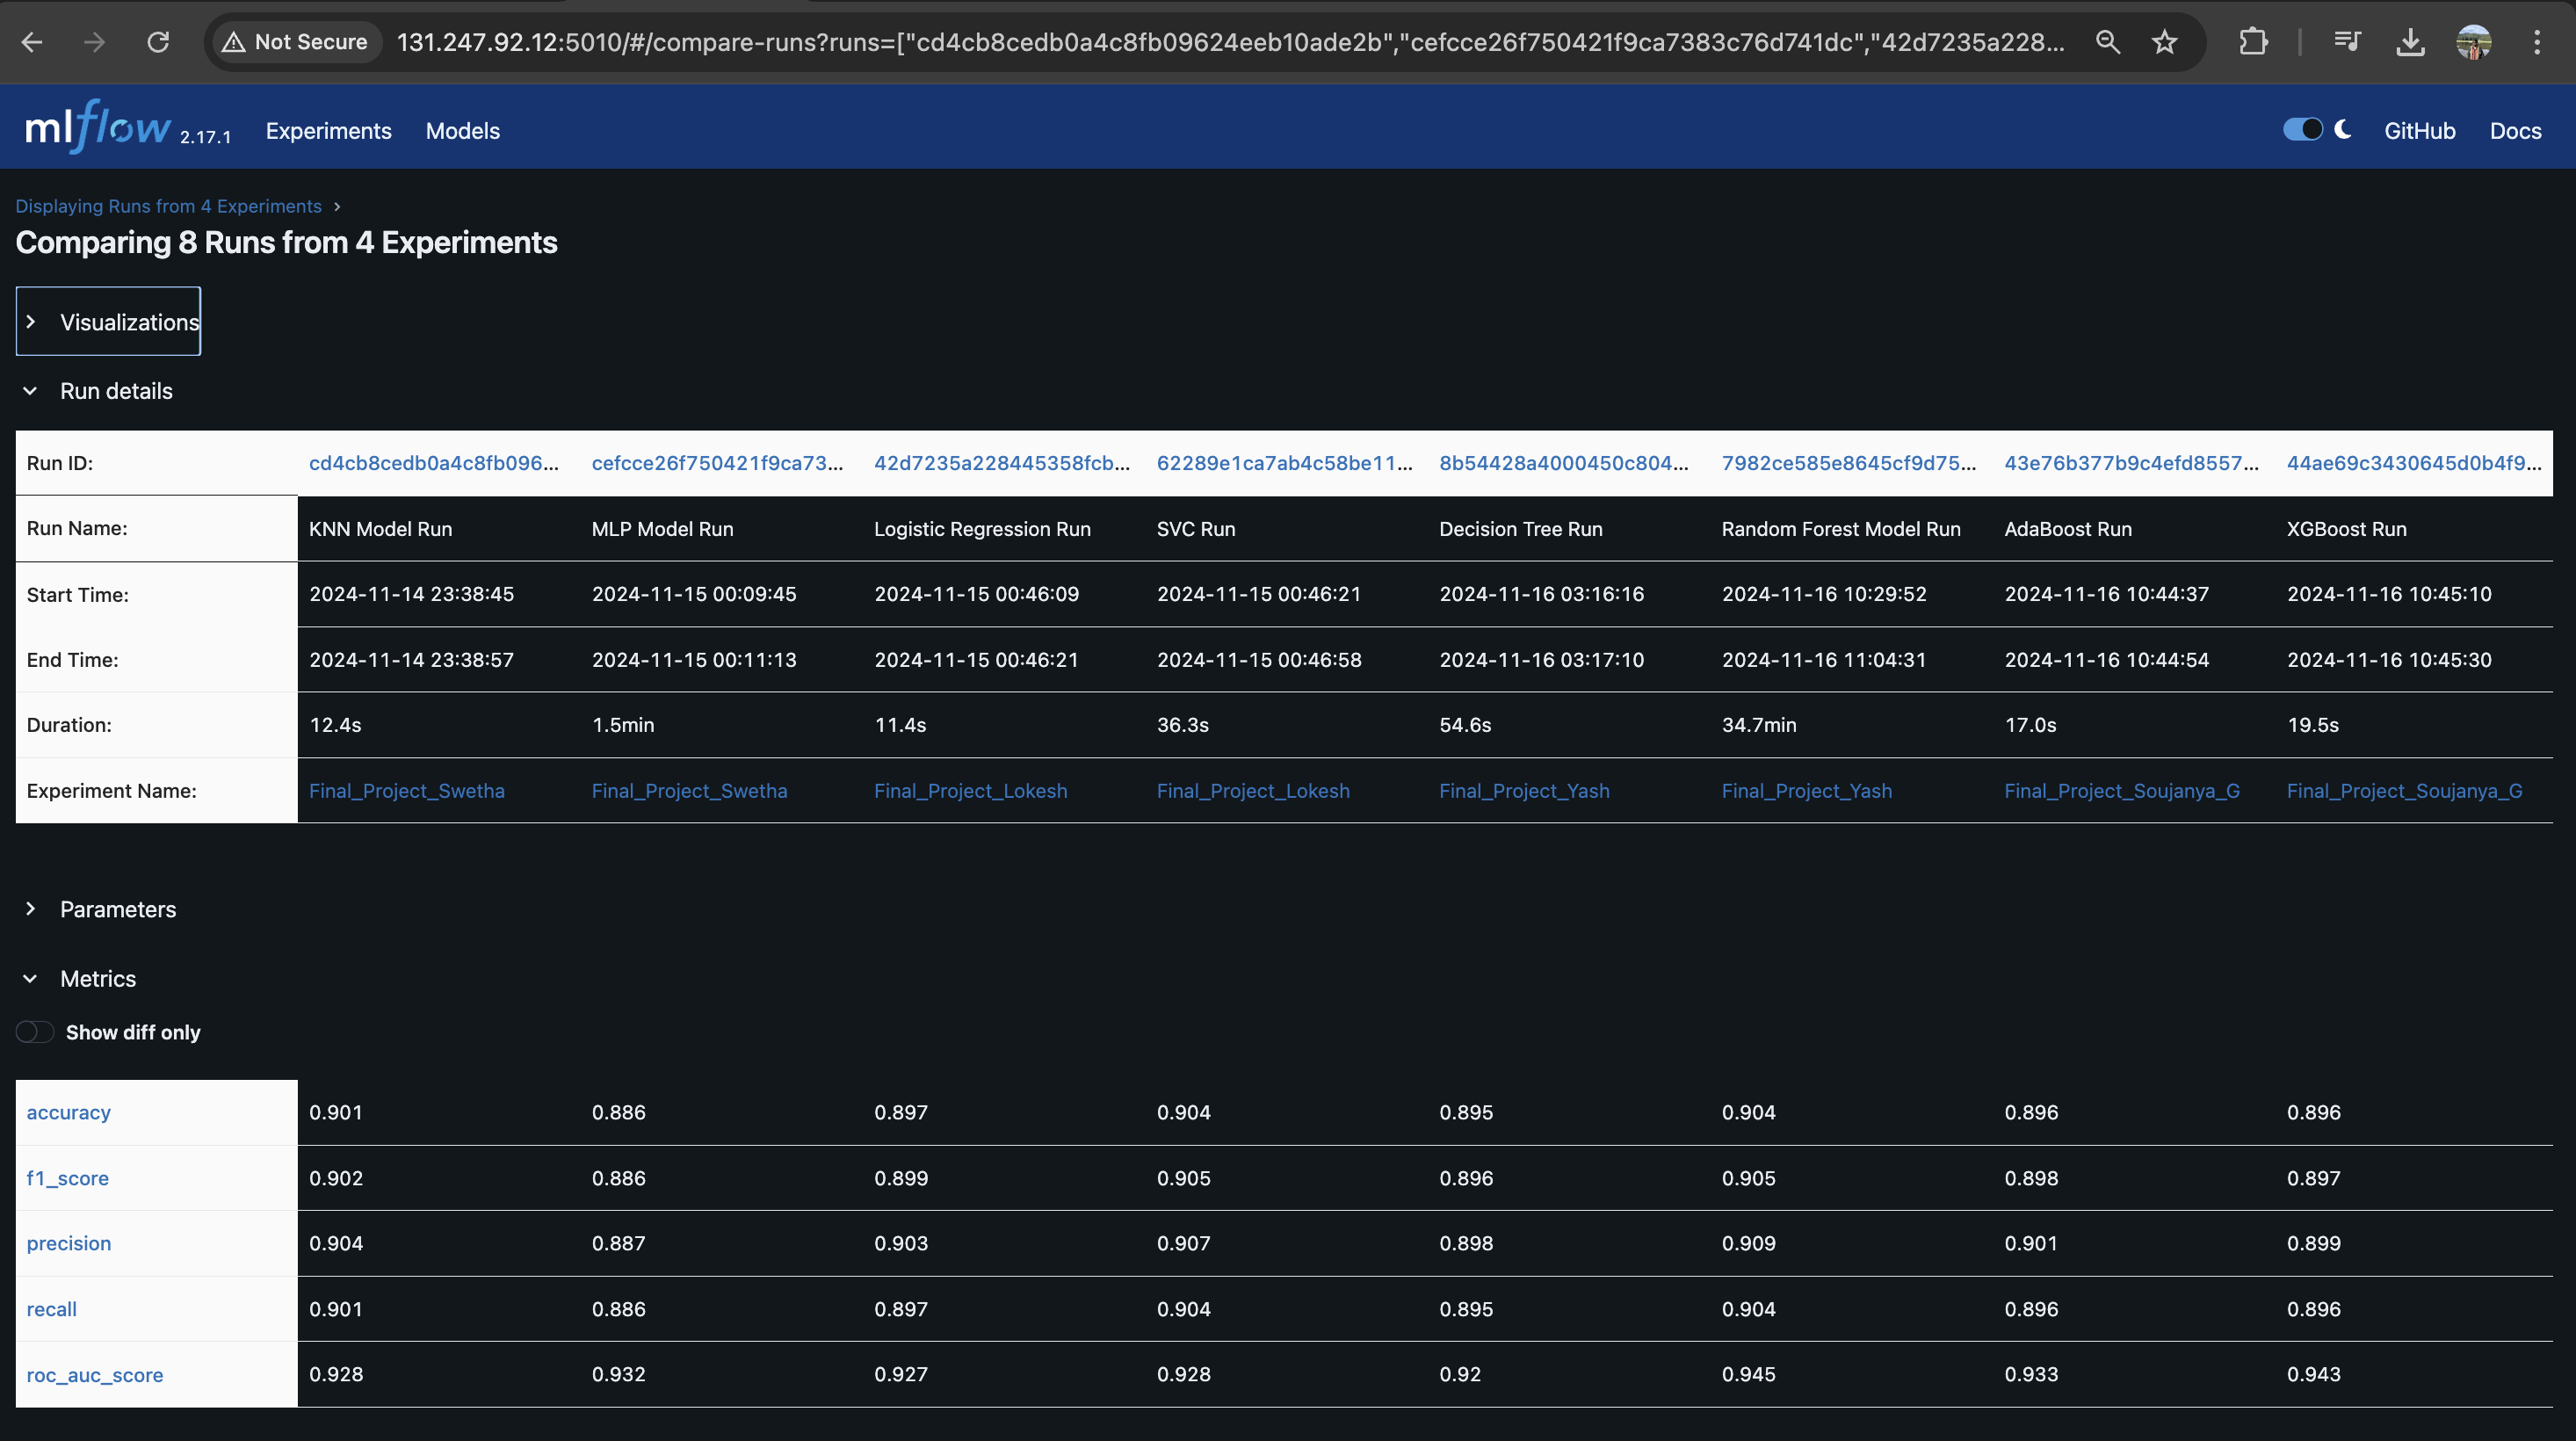

The evaluation of machine learning models applied to the solar footprint dataset reveals their effectiveness in predicting techno-economic feasibility of potential solar sites. The metrics highlight the following insights:

- **KNN Model**: With an F1 score of **0.902** and ROC AUC of **0.928**, KNN demonstrates strong predictive performance, effectively balancing precision and recall. This indicates its ability to classify sites as feasible or non-feasible with high reliability.
- **MLP Model**: The MLP model achieved an ROC AUC of **0.932**, reflecting its ability to differentiate feasible and non-feasible sites effectively. However, its lower F1 score (**0.886**) suggests room for improvement in handling imbalanced classifications.
- **SVC**: With the highest accuracy (**0.904**) and precision (**0.907**), SVC excels in reducing false positives, making it well-suited for scenarios where investment risks need minimization.
- **Random Forest Model**: Achieved the highest ROC AUC (**0.945**) and strong F1 score (**0.904**), showcasing its ability to provide highly reliable and robust predictions. It is ideal for prioritizing site selection based on techno-economic feasibility.
- **AdaBoost and XGBoost**: Both models performed well, with XGBoost achieving an F1 score of **0.899** and an ROC AUC of **0.943**, making it highly effective for accurately classifying solar sites.

### Conclusion:

The **Random Forest Model** is the best-suited choice for this project due to its exceptional ability to identify feasible solar sites with the highest accuracy and reliability. It minimizes the risk of overlooking viable sites (false negatives) while ensuring non-feasible sites are not mistakenly considered (false positives). **XGBoost** serves as an excellent alternative with comparable performance and scalability.

**Recommendation**: Deploy the **Random Forest Model** to prioritize site selection based on techno-economic criteria, ensuring optimal resource allocation for stakeholders. This approach aligns with the project's goal to support sustainable energy initiatives by maximizing return on investment and accelerating renewable energy adoption.

##  Model Registration

In [16]:
from mlflow.tracking import MlflowClient
# Initialize MLflow client
client = MlflowClient()

# The run_id was captured earlier during the run
# Specify the model URI
manual_run_id = "7982ce585e8645cf9d7534785523a4d0"
model_uri = f"runs:/{manual_run_id}/model"

# Define the model name
model_name = "SOLAR_EXPERIMENT_RF_BEST_MODEL"

# Register the model
result = mlflow.register_model(model_uri=model_uri, name=model_name)

print(f"Name: {result.name}\nVersion: {result.version}")

Successfully registered model 'SOLAR_EXPERIMENT_RF_BEST_MODEL'.
2024/11/17 11:08:55 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: SOLAR_EXPERIMENT_RF_BEST_MODEL, version 1


Name: SOLAR_EXPERIMENT_RF_BEST_MODEL
Version: 1


Created version '1' of model 'SOLAR_EXPERIMENT_RF_BEST_MODEL'.


### Transitioning Models Between Stages

We will manage model versions and stages using the MLflow Model Registry.

In [17]:
# Register the best model
model_uri = f"runs:/{manual_run_id}/model"
result = mlflow.register_model(model_uri=model_uri, name=model_name)

version = result.version

# Transition the model to "Production" stage
client.transition_model_version_stage(
    name=model_name,
    version=version,
    stage="Production"
)

print(f"Model {model_name} version {version} is now in Production.")

Registered model 'SOLAR_EXPERIMENT_RF_BEST_MODEL' already exists. Creating a new version of this model...
2024/11/17 11:09:32 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: SOLAR_EXPERIMENT_RF_BEST_MODEL, version 2
Created version '2' of model 'SOLAR_EXPERIMENT_RF_BEST_MODEL'.


Model SOLAR_EXPERIMENT_RF_BEST_MODEL version 2 is now in Production.
